# Trp-cage

In [ ]:
import sys
import math
sys.path.append("/Users/rafalpwiewiora/repos/NMpathAnalysis/nmpath")
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pyemma
import mdtraj as md
from glob import glob

# My modules
from auxfunctions import *
from mfpt import *
from clustering import *
from nmm import NonMarkovModel, MarkovPlusColorModel, DiscretePathEnsemble

# Print 
from IPython.display import Markdown, display
import multiprocessing

from collections import Counter

import seaborn as sns
sns.set_style('ticks')
sns.set_context('talk')

## Auxiliary functions

In [2]:
def get_trans_paths_md(dtrajs):
    
    macro_traj = []

    for micro in dtrajs[0]:
        if micro in stateA:
            macro_traj.append(0)
        elif micro in stateB:
            macro_traj.append(2)
        else:
            macro_traj.append(1)
            
    traj = dtrajs[0]
    int_trajs = []
    int_trajs_nonprod = []

    int_traj = []
    in_int = False
    int_start = None
    int_end = None
    for i in range(len(macro_traj) - 1):
        if in_int:
            int_traj.append(traj[i])
            if macro_traj[i+1] in [0,2]:
                in_int = False
                int_end = macro_traj[i+1]
                if int_end != int_start:
                    int_trajs.append(int_traj)
                int_traj = []
        elif macro_traj[i] != macro_traj[i+1]:
            if macro_traj[i] in [0,2] and macro_traj[i+1] in [1]:
                in_int = True
                int_start = macro_traj[i]
                
    return int_trajs         

def get_trans_paths_md_wdirectpaths(dtrajs):
    
    # this returns direct pathways too, hence keeps the start and final macrostate frames in the paths
    
    macro_traj = []

    for micro in dtrajs[0]:
        if micro in stateA:
            macro_traj.append(0)
        elif micro in stateB:
            macro_traj.append(2)
        else:
            macro_traj.append(1)
            
    traj = dtrajs[0]
    int_trajs = []
    int_trajs_nonprod = []

    int_traj = []
    in_int = False
    int_start = None
    int_end = None
    for i in range(len(macro_traj) - 1):
        if in_int:
            int_traj.append(traj[i])
            if macro_traj[i+1] in [0,2]:
                in_int = False
                int_end = macro_traj[i+1]
                if int_end != int_start:
                    int_trajs.append(int_traj)
                int_traj = []
        elif macro_traj[i] != macro_traj[i+1]:
            if macro_traj[i] in [0,2] and macro_traj[i+1] in [1]:
                in_int = True
                int_start = macro_traj[i]
            elif macro_traj[i] in [0,2] and macro_traj[i+1] in [0,2]:
                int_trajs.append([traj[i],traj[i+1]])    
                
    return int_trajs      

def get_trans_paths_msm(msm, lags, min_paths=1000):

    int_trajs_all = []

    for msm_index in range(len(msm)):

        print('lag: %d' % lags[msm_index])

        count = 0

        int_trajs = []

        while len(int_trajs) < min_paths:
            traj = msm[msm_index].simulate(np.int(100000))
            macro_traj = []

            for micro in traj:
                if micro in stateA:
                    macro_traj.append(0)
                elif micro in stateB:
                    macro_traj.append(2)
                else:
                    macro_traj.append(1)

            transition = False

            if len(set(macro_traj)) == 3:
                transition = True

            if transition:
                count += 1

            # print(count)

            if transition:
                int_traj = []
                in_int = False
                int_start = None
                int_end = None
                for i in range(len(macro_traj) - 1):
                    if in_int:
                        int_traj.append(traj[i])
                        if macro_traj[i+1] in [0,2]:
                            in_int = False
                            int_end = macro_traj[i+1]
                            if int_end != int_start:
                                int_trajs.append(int_traj)
                            int_traj = []
                    elif macro_traj[i] != macro_traj[i+1]:
                        if macro_traj[i] in [0,2] and macro_traj[i+1] in [1]:
                            in_int = True
                            int_start = macro_traj[i]

            print(len(int_trajs))              

        int_trajs_all.append(int_trajs)
        
    return int_trajs_all

def get_trans_paths_msm_wdirectpaths(msm, lags, min_paths=1000):

    int_trajs_all = []

    for msm_index in range(len(msm)):

        print('lag: %d' % lags[msm_index])

        count = 0
        direct_count = 0

        int_trajs = []

        while len(int_trajs)-direct_count < min_paths:
            traj = msm[msm_index].simulate(np.int(100000))
            macro_traj = []

            for micro in traj:
                if micro in stateA:
                    macro_traj.append(0)
                elif micro in stateB:
                    macro_traj.append(2)
                else:
                    macro_traj.append(1)

            transition = False

            if len(set(macro_traj)) == 3:
                transition = True

            #if transition:
             #   count += 1

            # print(count)

            #if transition:
            if True:
                int_traj = []
                in_int = False
                int_start = None
                int_end = None
                for i in range(len(macro_traj) - 1):
                    if in_int:
                        int_traj.append(traj[i])
                        if macro_traj[i+1] in [0,2]:
                            in_int = False
                            int_end = macro_traj[i+1]
                            if int_end != int_start:
                                int_trajs.append(int_traj)
                            int_traj = []
                    elif macro_traj[i] != macro_traj[i+1]:
                        if macro_traj[i] in [0,2] and macro_traj[i+1] in [1]:
                            in_int = True
                            int_start = macro_traj[i]
                        elif macro_traj[i] in [0,2] and macro_traj[i+1] in [0,2]:
                            int_trajs.append([traj[i],traj[i+1]])
                            direct_count += 1

            print(len(int_trajs))              

        int_trajs_all.append(int_trajs)
        
    return int_trajs_all

def count_md_bootstrap(int_trajs, n_samples=1000):
    
    bootstrap_counts = []

    int_trajs_sorted = [x for x in range(100) if x not in stateA+stateB]

    for bootstrap in range(n_samples):

        int_trajs_ = np.random.choice(int_trajs, len(int_trajs))
        
        counter = Counter([np.argwhere(int_trajs_sorted == i)[0,0] for i in np.concatenate(int_trajs_)])
        counts = [counter[i] for i in range(10)]
        counts = np.array(counts) / np.sum(counts)

        bootstrap_counts.append(counts)
        
    return bootstrap_counts

def count_md_bootstrap_wdirectpaths(int_trajs, n_samples=1000):
    
    bootstrap_counts = []

    int_trajs_sorted = [x for x in range(100) if x not in stateA+stateB]

    for bootstrap in range(n_samples):

        int_trajs_ = np.random.choice(int_trajs, len(int_trajs))

        counter = Counter([np.argwhere(int_trajs_sorted == i)[0,0] for i in [x for x in np.concatenate(int_trajs_) if x in int_trajs_sorted]])
        counts = [counter[i] for i in range(10)]
        counts = np.array(counts) / len(np.concatenate(int_trajs_))

        bootstrap_counts.append(counts)
        
    return bootstrap_counts

def count_msm(int_trajs_msm, msm):
    
    counts_all = []

    int_trajs_sorted = [x for x in range(100) if x not in stateA+stateB]

    for msm_index in range(len(msm)):

        counter = Counter([np.argwhere(int_trajs_sorted == i)[0,0] for i in np.concatenate(int_trajs_msm[msm_index])])
        counts = [counter[i] for i in range(10)]
        counts = np.array(counts) / np.sum(counts)

        counts_all.append(counts)
        
    return counts_all

def count_msm_wdirectpaths(int_trajs_msm, msm):
    
    counts_all = []

    int_trajs_sorted = [x for x in range(100) if x not in stateA+stateB]

    for msm_index in range(len(msm)):
        
        counter = Counter([np.argwhere(int_trajs_sorted == i)[0,0] for i in [x for x in np.concatenate(int_trajs_msm[msm_index]) if x in int_trajs_sorted]])
        counts = [counter[i] for i in range(10)]
        counts = np.array(counts) / len(np.concatenate(int_trajs_msm[msm_index]))
    
        counts_all.append(counts)
        
    return counts_all

def get_trans_paths_nm(path_ensemble, nm_model):

    int_trajs_all_nm = []

    for traj in path_ensemble:
        int_trajs = []

        int_traj = []
        in_int = False
        int_start = None
        int_end = None
        for i in range(len(traj) - 1):
            if in_int:
                int_traj.append(traj[i])
                if traj[i+1] in nm_model.stateA+nm_model.stateB:
                    in_int = False
                    int_end = traj[i+1]
                    if int_end != int_start:
                        int_trajs.append(int_traj)
                    int_traj = []
            elif traj[i] in nm_model.stateA+nm_model.stateB and traj[i+1] in [x for x in range(12) if x not in nm_model.stateA+nm_model.stateB]:
                in_int = True
                int_start = traj[i] 
            
        int_trajs_all_nm.append(int_trajs)
        
    # the nm_model has renumbered microstates - translate to original labels
    trans_dict = dict()

    for i in range(len(dtrajs[0])):
        if dtrajs[0][i] in [x for x in list(range(100)) if x not in (stateA+stateB)]:
            if nm_model.trajectories[0][i] not in trans_dict:
                trans_dict[nm_model.trajectories[0][i]] = dtrajs[0][i]
        if len(trans_dict) == 10:
            break
            
    int_trajs_nm = []

    for x in int_trajs_all_nm:
        for traj in x:
            int_trajs_nm.append([])
            for i in traj:
                int_trajs_nm[-1].append(trans_dict[i])            
    
    return int_trajs_nm

def get_trans_paths_nm_wdirectpaths(path_ensemble, nm_model):

    int_trajs_all_nm = []

    for traj in path_ensemble:
        int_trajs = []

        int_traj = []
        in_int = False
        int_start = None
        int_end = None
        for i in range(len(traj) - 1):
            if in_int:
                int_traj.append(traj[i])
                if traj[i+1] in nm_model.stateA+nm_model.stateB:
                    in_int = False
                    int_end = traj[i+1]
                    if int_end != int_start:
                        int_trajs.append(int_traj)
                    int_traj = []
            elif traj[i] != traj[i+1]:        
                if traj[i] in nm_model.stateA+nm_model.stateB and traj[i+1] in [x for x in range(12) if x not in nm_model.stateA+nm_model.stateB]:
                    in_int = True
                    int_start = traj[i]
                elif traj[i] in nm_model.stateA+nm_model.stateB and traj[i+1] in nm_model.stateA+nm_model.stateB:
                    int_trajs.append([traj[i],traj[i+1]])    
            
        int_trajs_all_nm.append(int_trajs)
        
    # the nm_model has renumbered microstates - translate to original labels
    trans_dict = dict()

    for i in range(len(dtrajs[0])):
        if nm_model.trajectories[0][i] not in trans_dict:
            trans_dict[nm_model.trajectories[0][i]] = dtrajs[0][i]
        if len(trans_dict) == 12:
            break
            
    int_trajs_nm = []

    for x in int_trajs_all_nm:
        for traj in x:
            int_trajs_nm.append([])
            for i in traj:
                int_trajs_nm[-1].append(trans_dict[i])            
    
    return int_trajs_nm

def count_nm(int_trajs_nm):
    
    int_trajs_sorted = [x for x in range(100) if x not in stateA+stateB]

    counter = Counter([np.argwhere(int_trajs_sorted == i)[0,0] for i in np.concatenate(int_trajs_nm)])
    counts = [counter[i] for i in range(10)]
    counts = np.array(counts) / np.sum(counts)

    return counts

def count_nm_wdirectpaths(int_trajs_nm):
    
    int_trajs_sorted = [x for x in range(100) if x not in stateA+stateB]
    
    counter = Counter([np.argwhere(int_trajs_sorted == i)[0,0] for i in [x for x in np.concatenate(int_trajs_nm) if x in int_trajs_sorted]])
    counts = [counter[i] for i in range(10)]
    counts = np.array(counts) / len(np.concatenate(int_trajs_nm))

    return counts

def weighted_fundamental_sequences_md(fs_list):
    
    element_count = {}
    tot_count = 0
    for element in fs_list:
        pseudo_index = tuple(element)
        tot_count += 1
        if pseudo_index not in element_count:
            element_count[pseudo_index] = 1
        else:
            element_count[pseudo_index] += 1

    weights = []
    new_fs_list = []
    for key, value in element_count.items():
        new_fs_list.append(key)
        weights.append(value / float(tot_count))

    reversed_sorted_weights, reversed_sorted_new_fs_list = \
        reverse_sort_lists(weights, new_fs_list)

    return reversed_sorted_new_fs_list, reversed_sorted_weights

def kl_divergence(x,y):
    suma=0
    
    size = len(x)
    assert(size == len(y))
    
    for i,xi in enumerate(x):
        suma += xi * np.log(xi/y[i])

    return suma

def rmse(x,y):
    sum_of_squares=0
    
    size = len(x)
    assert(size == len(y))
    
    for i,xi in enumerate(x):
        sum_of_squares += (xi-y[i])**2

    return np.sqrt(sum_of_squares/size)

## Reading Data

In [132]:
dtrajs = np.load("../vamp_scoring/automatic_eigenvalue/trpcage/dtrajs_trpcage_lag10ns.npy")

# unfolded
stateA = [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 38, 39, 40, 41, 43, 46, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 99]

# folded
stateB = [3, 14, 23, 37, 56]

## MSM estimation

In [5]:
lags = np.asarray([1, 5, 10, 20, 50, 250, 500, 1000, 5000])

msm = [pyemma.msm.estimate_markov_model(list(dtrajs), lag=lag, dt_traj='0.0002 us') for lag in lags]

## p(x|TP)

In [6]:
# MD

In [133]:
int_trajs = get_trans_paths_md(dtrajs)

In [8]:
len(int_trajs)

79

In [9]:
bootstrap_counts = count_md_bootstrap(int_trajs, n_samples=1000)

In [10]:
# MSM

In [11]:
int_trajs_msm = get_trans_paths_msm(msm, lags)

lag: 1
65
126
188
270
346
408
469
533
594
667
743
812
880
974
1037
lag: 5
91
186
307
414
519
633
724
835
951
1048
lag: 10
120
270
376
486
611
733
860
989
1117
lag: 20
138
283
406
585
728
876
1040
lag: 50
184
392
600
796
1006
lag: 250
461
920
1330
lag: 500
651
1289
lag: 1000
1028
lag: 5000
1751


In [12]:
[len(x) for x in int_trajs_msm]

[1037, 1048, 1117, 1040, 1006, 1330, 1289, 1028, 1751]

In [13]:
counts_msm = count_msm(int_trajs_msm, msm)

In [14]:
# haMSM

In [15]:
nm_model = NonMarkovModel(dtrajs, stateA, stateB, lag_time=1, coarse_macrostates=True)

In [16]:
my_path_ensembleAB = DiscretePathEnsemble.from_transition_matrix( nm_model.tmatrixAB(), nm_model.stateA, nm_model.stateB, n_paths=1000)
my_path_ensembleBA = DiscretePathEnsemble.from_transition_matrix( nm_model.tmatrixBA(), nm_model.stateB, nm_model.stateA, n_paths=1000)

In [17]:
path_ensemble = my_path_ensembleAB.trajectories + my_path_ensembleBA.trajectories

int_trajs_nm = get_trans_paths_nm(path_ensemble, nm_model)

In [18]:
len(int_trajs_nm)

472

In [19]:
counts_nm = count_nm(int_trajs_nm)

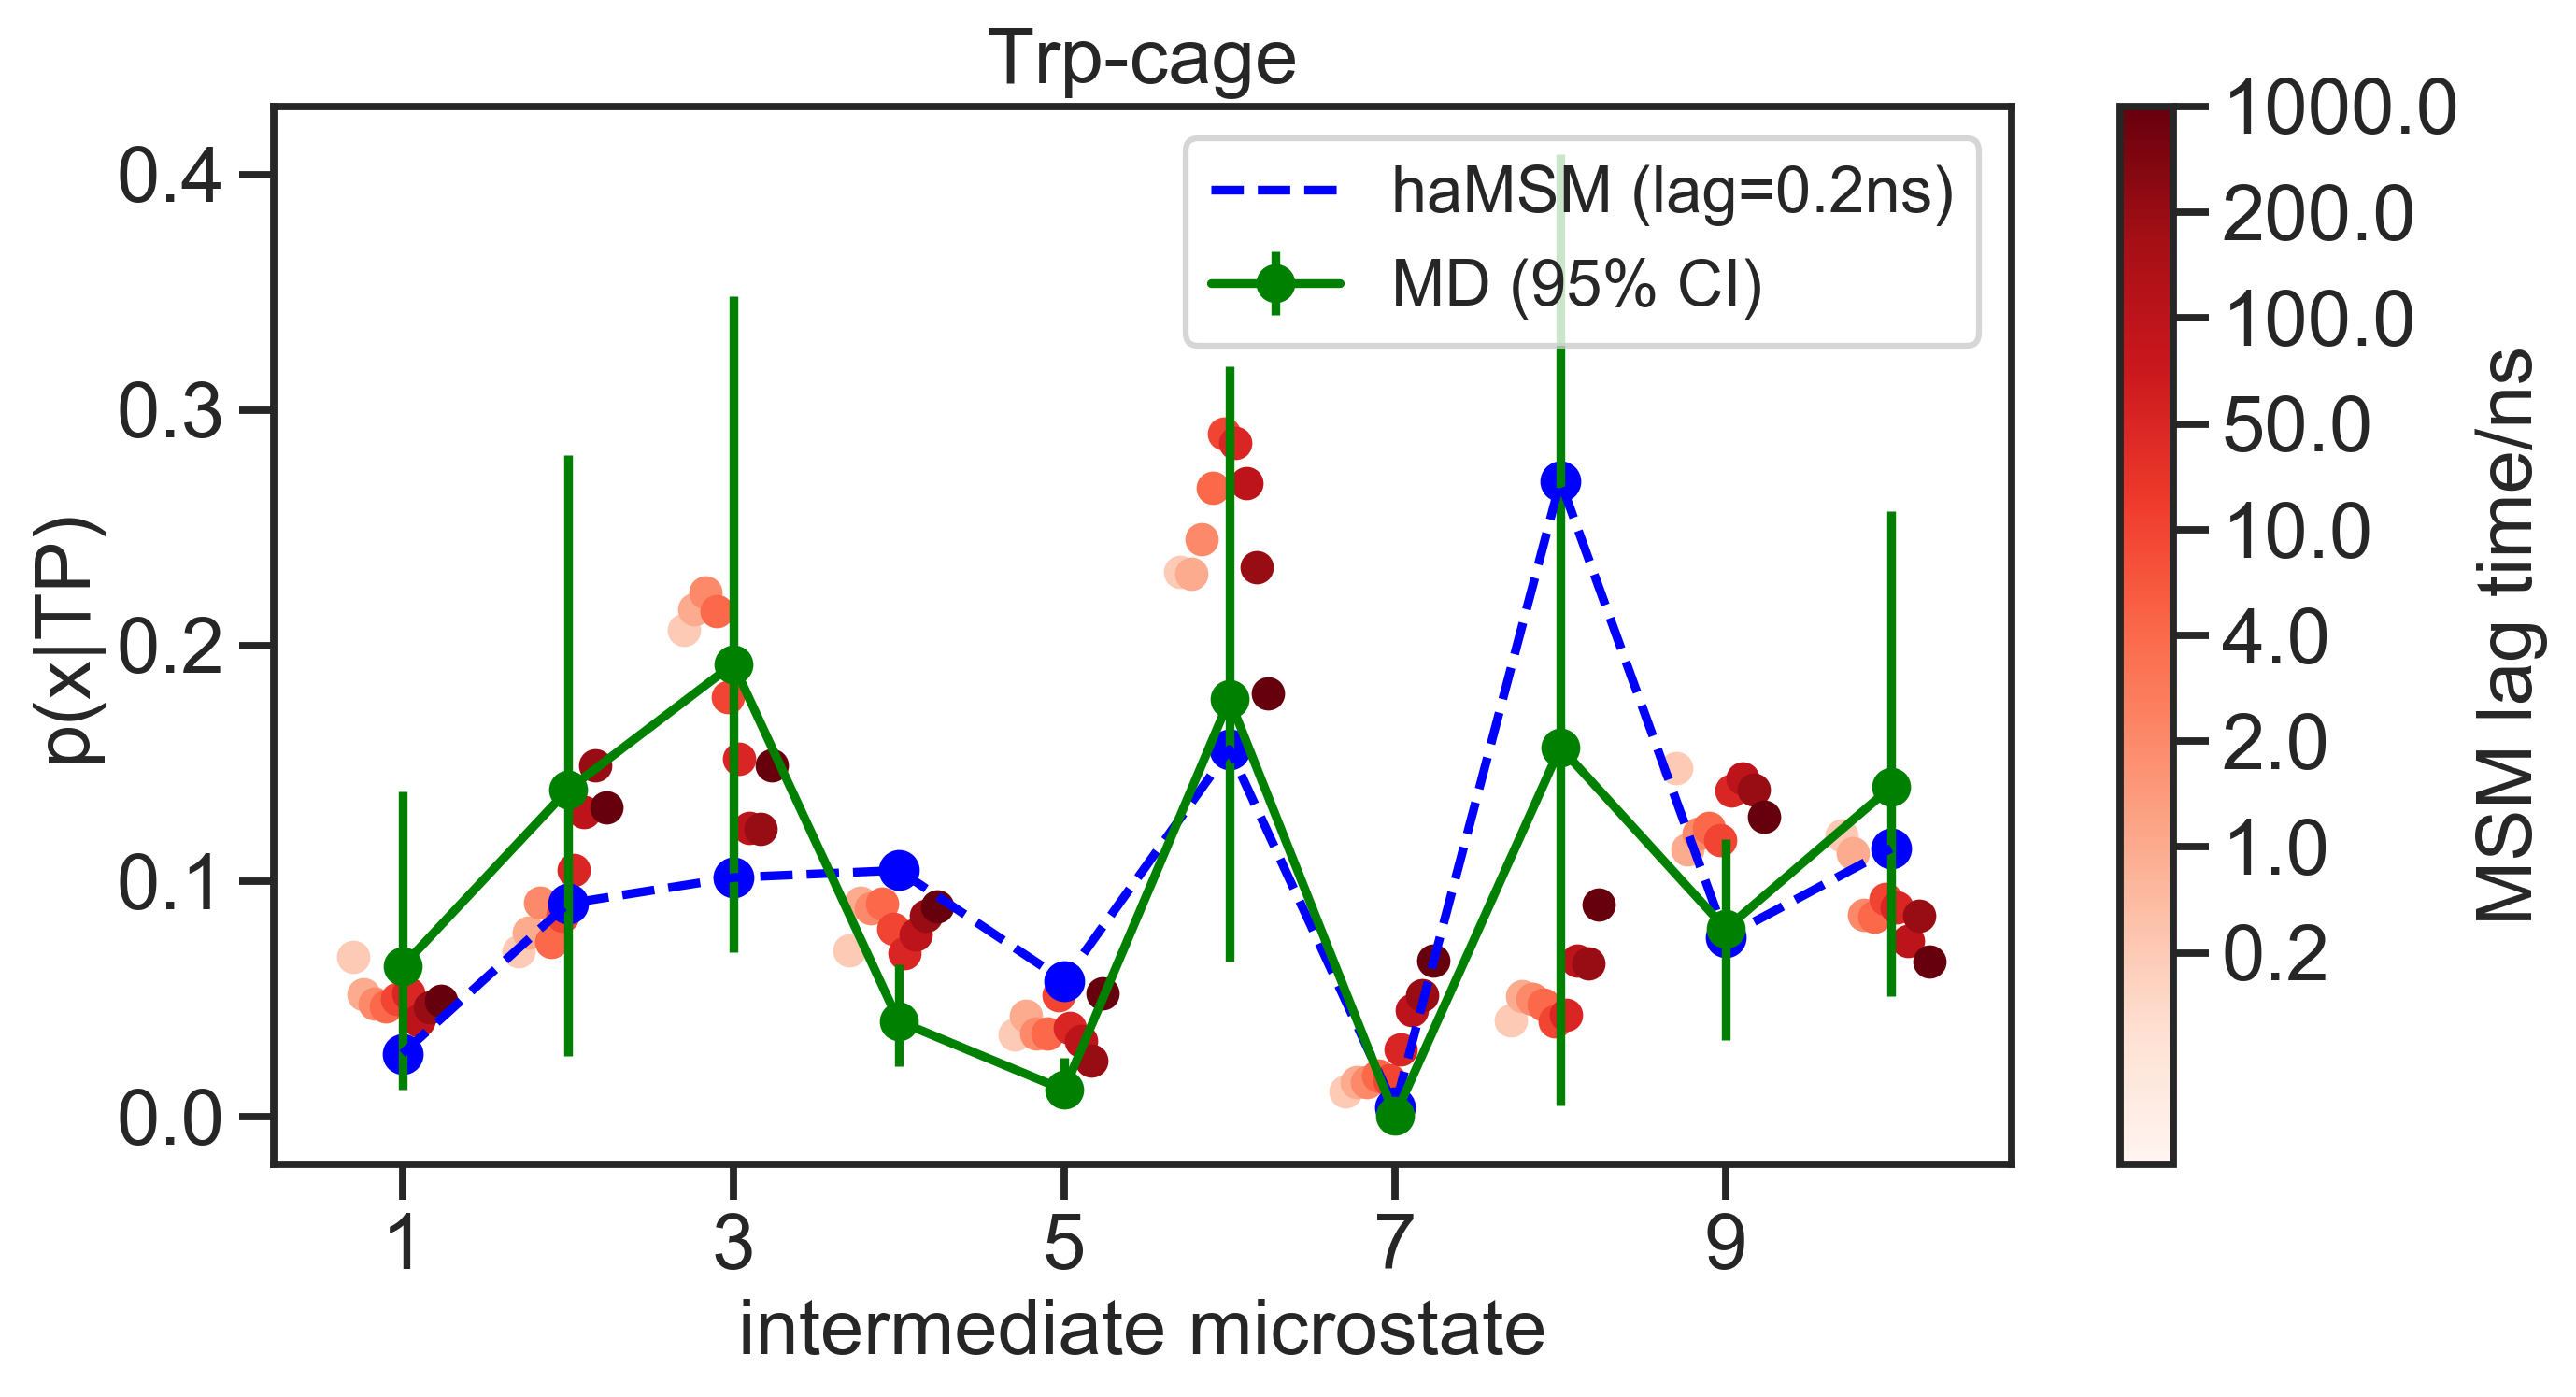

In [37]:
fig = plt.figure(dpi=300, figsize=(10,5))
fig.patch.set_facecolor('white')

norm = matplotlib.colors.Normalize(vmin=-2, vmax=8)
cmap = matplotlib.cm.ScalarMappable(norm=norm, cmap=matplotlib.cm.Reds)
cmap.set_array([])

for msm_index in range(9):
    plt.scatter(np.arange(0.7+0.2*msm_index/3,10.5), counts_msm[msm_index], color=cmap.to_rgba(msm_index), s=50)

cbar = plt.colorbar(cmap)
cbar.set_ticks(range(9))
cbar.set_ticklabels(lags[:9]*0.2)
cbar.set_label('MSM lag time/ns', fontsize=20)
cbar.ax.tick_params(labelsize=20)

plt.errorbar(range(1,11), np.mean(bootstrap_counts, axis=0), yerr=[(np.mean(bootstrap_counts, axis=0)-np.percentile(bootstrap_counts, 2.5, axis=0)), (np.percentile(bootstrap_counts, 97.5, axis=0)-np.mean(bootstrap_counts, axis=0))], marker='o', color='green', label='MD (95% CI)')

plt.plot(np.arange(1,11), counts_nm, '--', color='blue', label='haMSM (lag=0.2ns)')
plt.scatter(np.arange(1,11), counts_nm, color='blue')

plt.xlabel('intermediate microstate', fontsize=20)
plt.ylabel('p(x|TP)', fontsize=20)
plt.xticks(np.arange(1,11,2), np.arange(1,10,2), fontsize=20)
plt.yticks(np.arange(0, 0.5, 0.1), fontsize=20)
plt.title('Trp-cage', fontsize=20)
plt.legend()

plt.show()

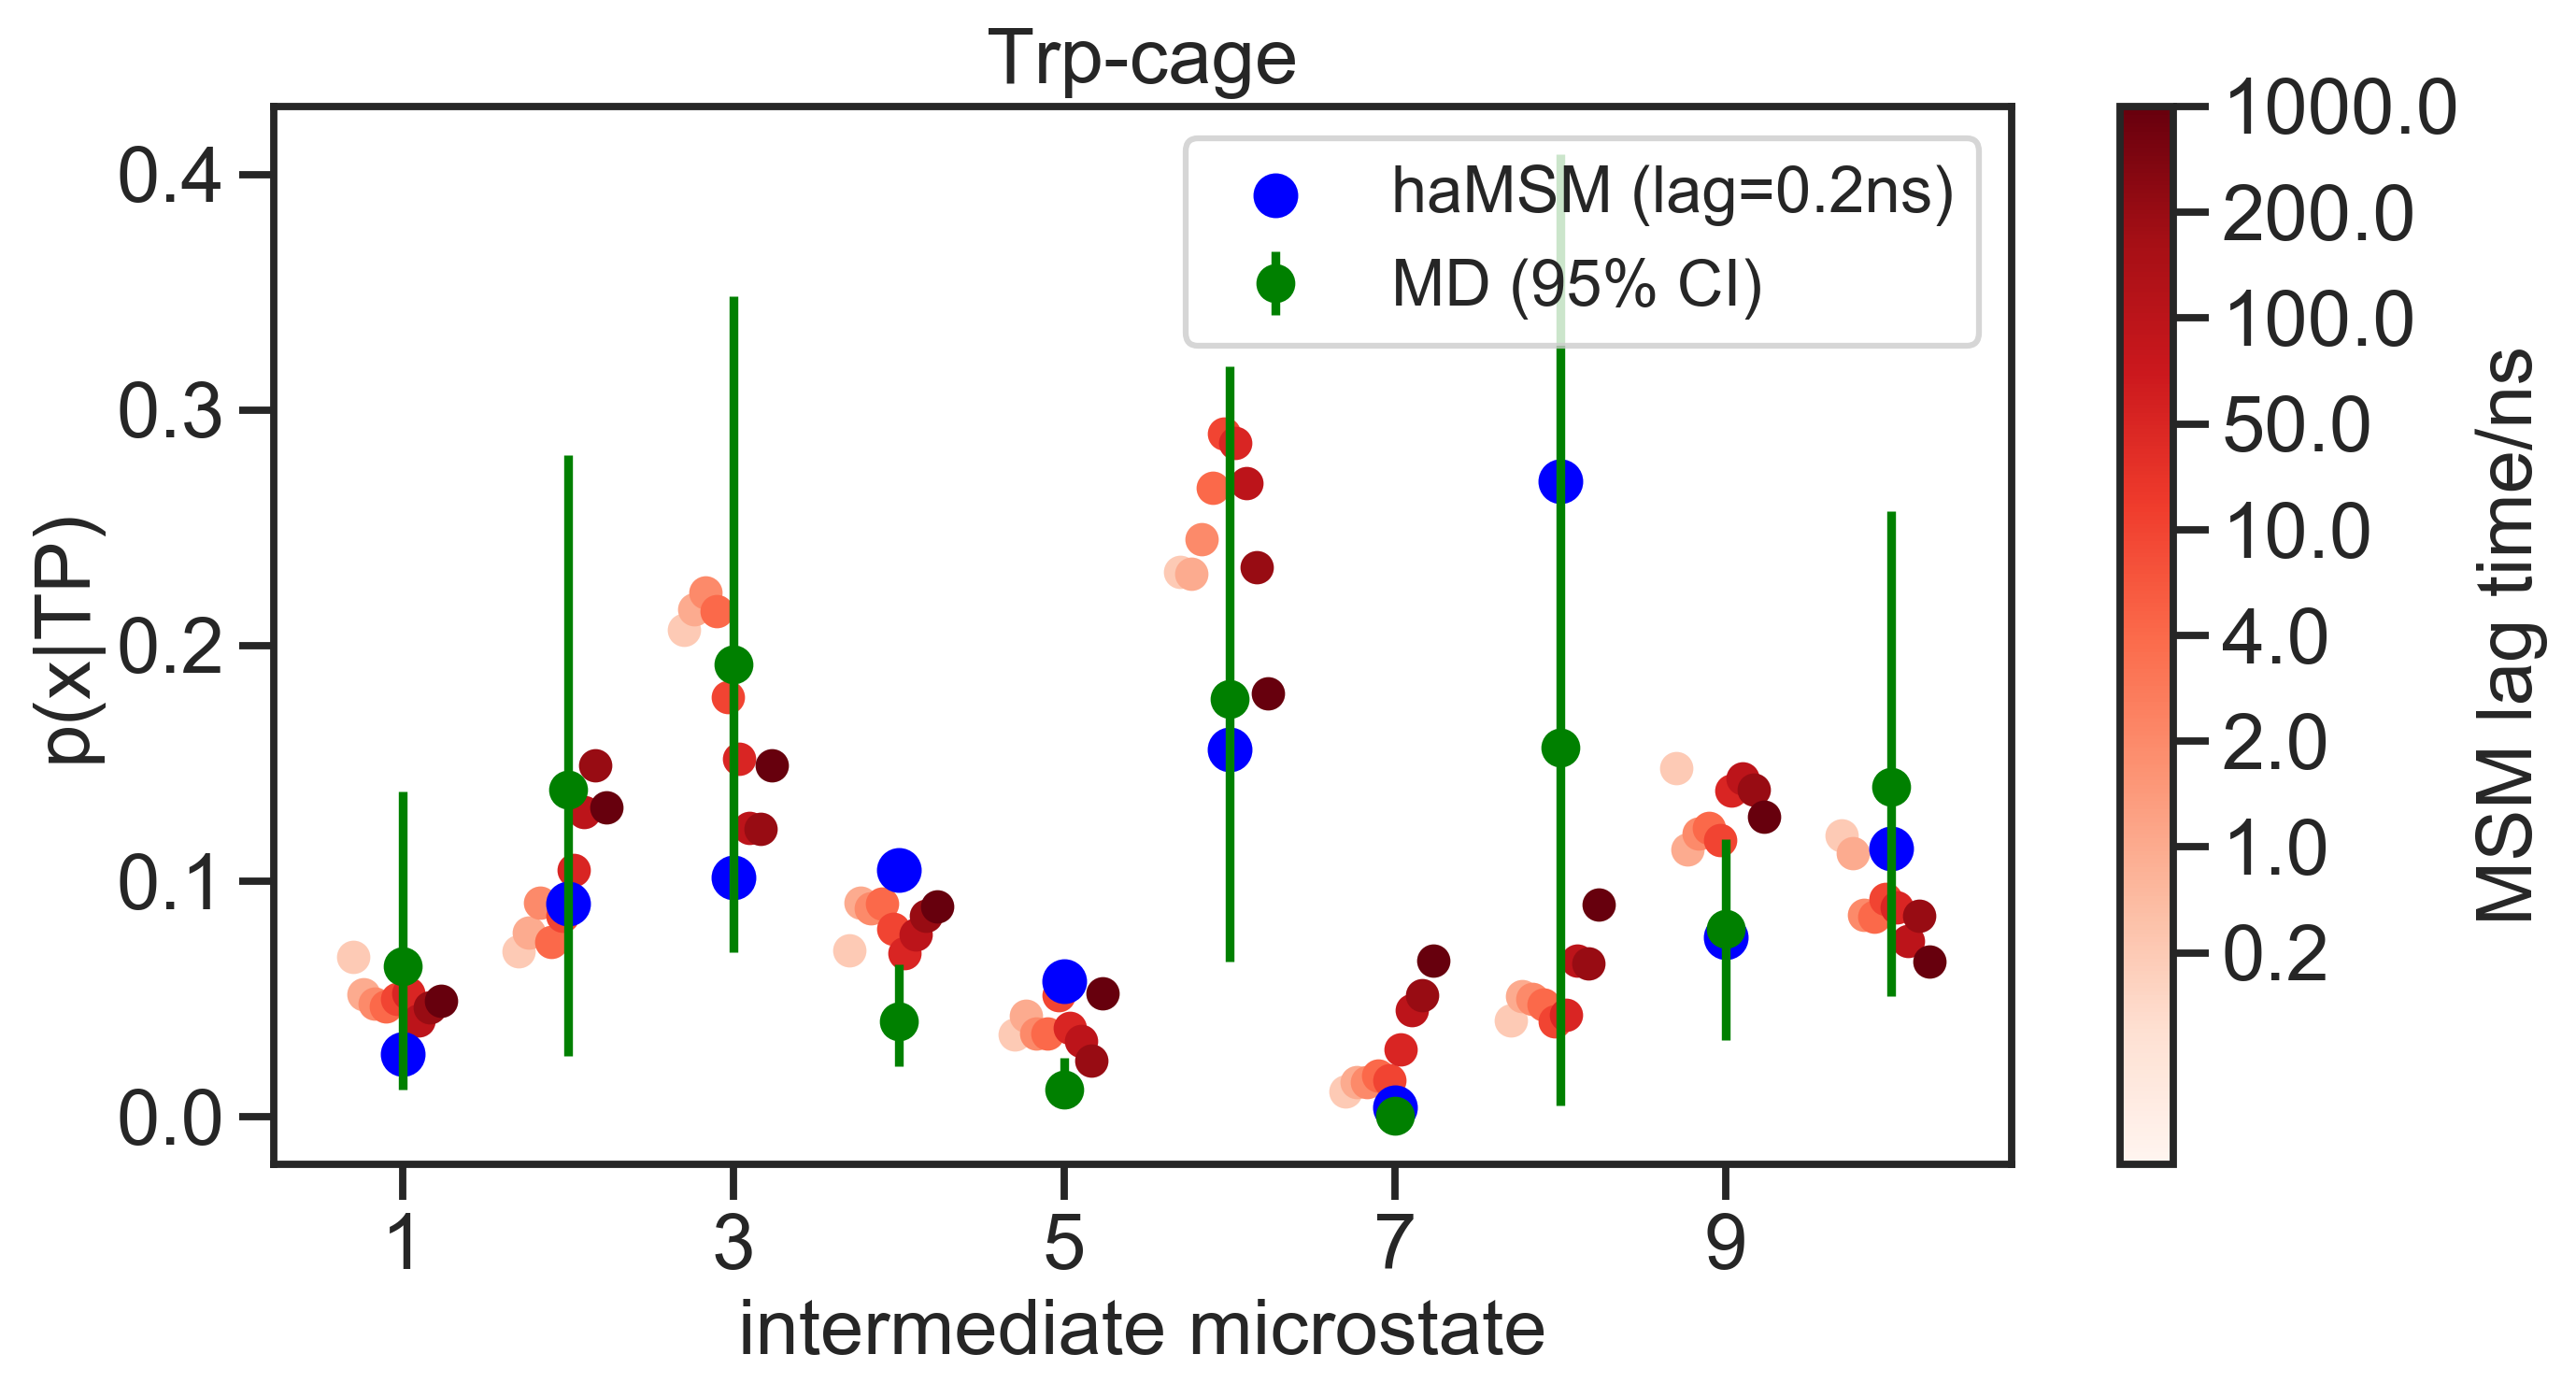

In [38]:
fig = plt.figure(dpi=300, figsize=(10,5))
fig.patch.set_facecolor('white')

norm = matplotlib.colors.Normalize(vmin=-2, vmax=8)
cmap = matplotlib.cm.ScalarMappable(norm=norm, cmap=matplotlib.cm.Reds)
cmap.set_array([])

for msm_index in range(9):
    plt.scatter(np.arange(0.7+0.2*msm_index/3,10.5), counts_msm[msm_index], color=cmap.to_rgba(msm_index), s=50)

cbar = plt.colorbar(cmap)
cbar.set_ticks(range(9))
cbar.set_ticklabels(lags[:9]*0.2)
cbar.set_label('MSM lag time/ns', fontsize=20)
cbar.ax.tick_params(labelsize=20)

plt.errorbar(range(1,11), np.mean(bootstrap_counts, axis=0), yerr=[(np.mean(bootstrap_counts, axis=0)-np.percentile(bootstrap_counts, 2.5, axis=0)), (np.percentile(bootstrap_counts, 97.5, axis=0)-np.mean(bootstrap_counts, axis=0))], color='green', label='MD (95% CI)', fmt='o')

plt.scatter(np.arange(1,11), counts_nm, color='blue', label='haMSM (lag=0.2ns)', s=100)

plt.xlabel('intermediate microstate', fontsize=20)
plt.ylabel('p(x|TP)', fontsize=20)
plt.xticks(np.arange(1,11,2), np.arange(1,10,2), fontsize=20)
plt.yticks(np.arange(0, 0.5, 0.1), fontsize=20)
plt.title('Trp-cage', fontsize=20)
plt.legend()

plt.show()

In [40]:
# KL divergence

In [39]:
[kl_divergence(np.mean(bootstrap_counts, axis=0), counts_msm[i]) + kl_divergence(counts_msm[i], np.mean(bootstrap_counts, axis=0)) for i in range(9)]

[0.34501729102321954,
 0.33201689363865394,
 0.33937310191299136,
 0.40143534362443867,
 0.4284065656647692,
 0.45609670669691416,
 0.5154826142636064,
 0.5088362065624246,
 0.6002486109199653]

In [44]:
kl_divergence(np.mean(bootstrap_counts, axis=0), counts_nm) + kl_divergence(counts_nm, np.mean(bootstrap_counts, axis=0))

0.3262995059989427

In [41]:
np.array([rmse(np.mean(bootstrap_counts, axis=0), counts_msm[i]) for i in range(9)])*100

array([5.28475225, 4.90077006, 5.21260581, 5.7618258 , 6.05014822,
       6.00153902, 5.84989011, 5.30687635, 4.76988055])

In [47]:
rmse(np.mean(bootstrap_counts, axis=0), counts_nm)*100

5.668090718416184

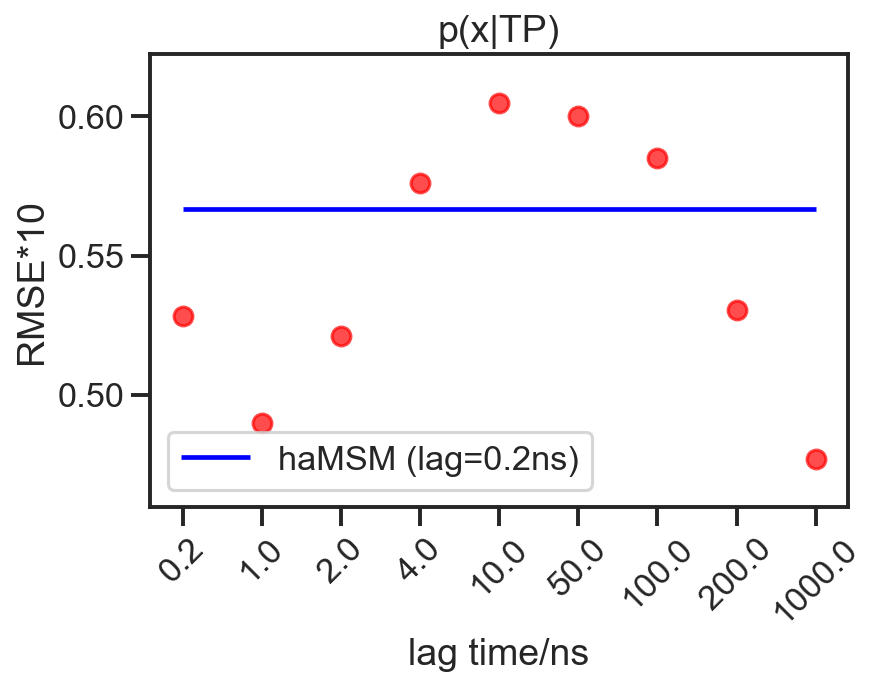

In [49]:
plt.figure(dpi=150)
plt.scatter(range(9), np.array([rmse(np.mean(bootstrap_counts, axis=0), counts_msm[i]) for i in range(9)])*10, color='red', alpha=0.7)
plt.xlabel('lag time/ns')
plt.xticks(range(9), lags*0.2, rotation=45)
plt.ylabel('RMSE*10')
plt.title('p(x|TP)')
plt.hlines(rmse(np.mean(bootstrap_counts, axis=0), counts_nm)*10, 0, 8, color='blue', label='haMSM (lag=0.2ns)')
plt.legend()
plt.show()

In [43]:
# NOW INCLUDE DIRECT PATHS

In [52]:
int_trajs = get_trans_paths_md_wdirectpaths(dtrajs)

In [104]:
len(int_trajs)

336

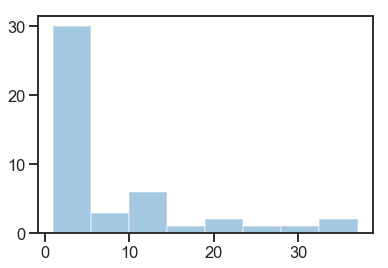

In [125]:
sns.distplot([len(x) for x in int_trajs if len(x) != 2 and len(x) < 50], norm_hist=False, kde=False)

In [115]:
np.sum([len(x) for x in int_trajs if len(x) > 500])

4439

In [116]:
np.sum([len(x) for x in int_trajs])

8561

In [117]:
4439/8561

0.5185141922672585

In [118]:
len([x for x in int_trajs if len(x) > 500])

4

In [128]:
np.array([len(x) for x in int_trajs if len(x) > 500])*0.2

array([215.6, 364.2, 128.2, 179.8])

In [54]:
bootstrap_counts = count_md_bootstrap_wdirectpaths(int_trajs, n_samples=1000)

In [55]:
int_trajs_msm = get_trans_paths_msm_wdirectpaths(msm, lags)

lag: 1
100
197
291
371
477
557
650
739
854
938
1031
1134
1248
1335
lag: 5
142
277
412
539
648
794
940
1076
1197
1323
lag: 10
166
328
484
653
801
931
1076
1244
1356
lag: 20
178
361
549
709
883
1061
1239
1403
lag: 50
286
519
763
1032
1272
1559
lag: 250
594
1205
1858
lag: 500
944
1974
lag: 1000
1820
lag: 5000
8916


In [56]:
counts_msm = count_msm_wdirectpaths(int_trajs_msm, msm)

In [57]:
nm_model = NonMarkovModel(dtrajs, stateA, stateB, lag_time=1, coarse_macrostates=True)

In [58]:
my_path_ensembleAB = DiscretePathEnsemble.from_transition_matrix( nm_model.tmatrixAB(), nm_model.stateA, nm_model.stateB, n_paths=1000)
my_path_ensembleBA = DiscretePathEnsemble.from_transition_matrix( nm_model.tmatrixBA(), nm_model.stateB, nm_model.stateA, n_paths=1000)

In [59]:
path_ensemble = my_path_ensembleAB.trajectories + my_path_ensembleBA.trajectories

int_trajs_nm = get_trans_paths_nm_wdirectpaths(path_ensemble, nm_model)

In [60]:
len(int_trajs_nm)

2000

In [61]:
counts_nm = count_nm_wdirectpaths(int_trajs_nm)

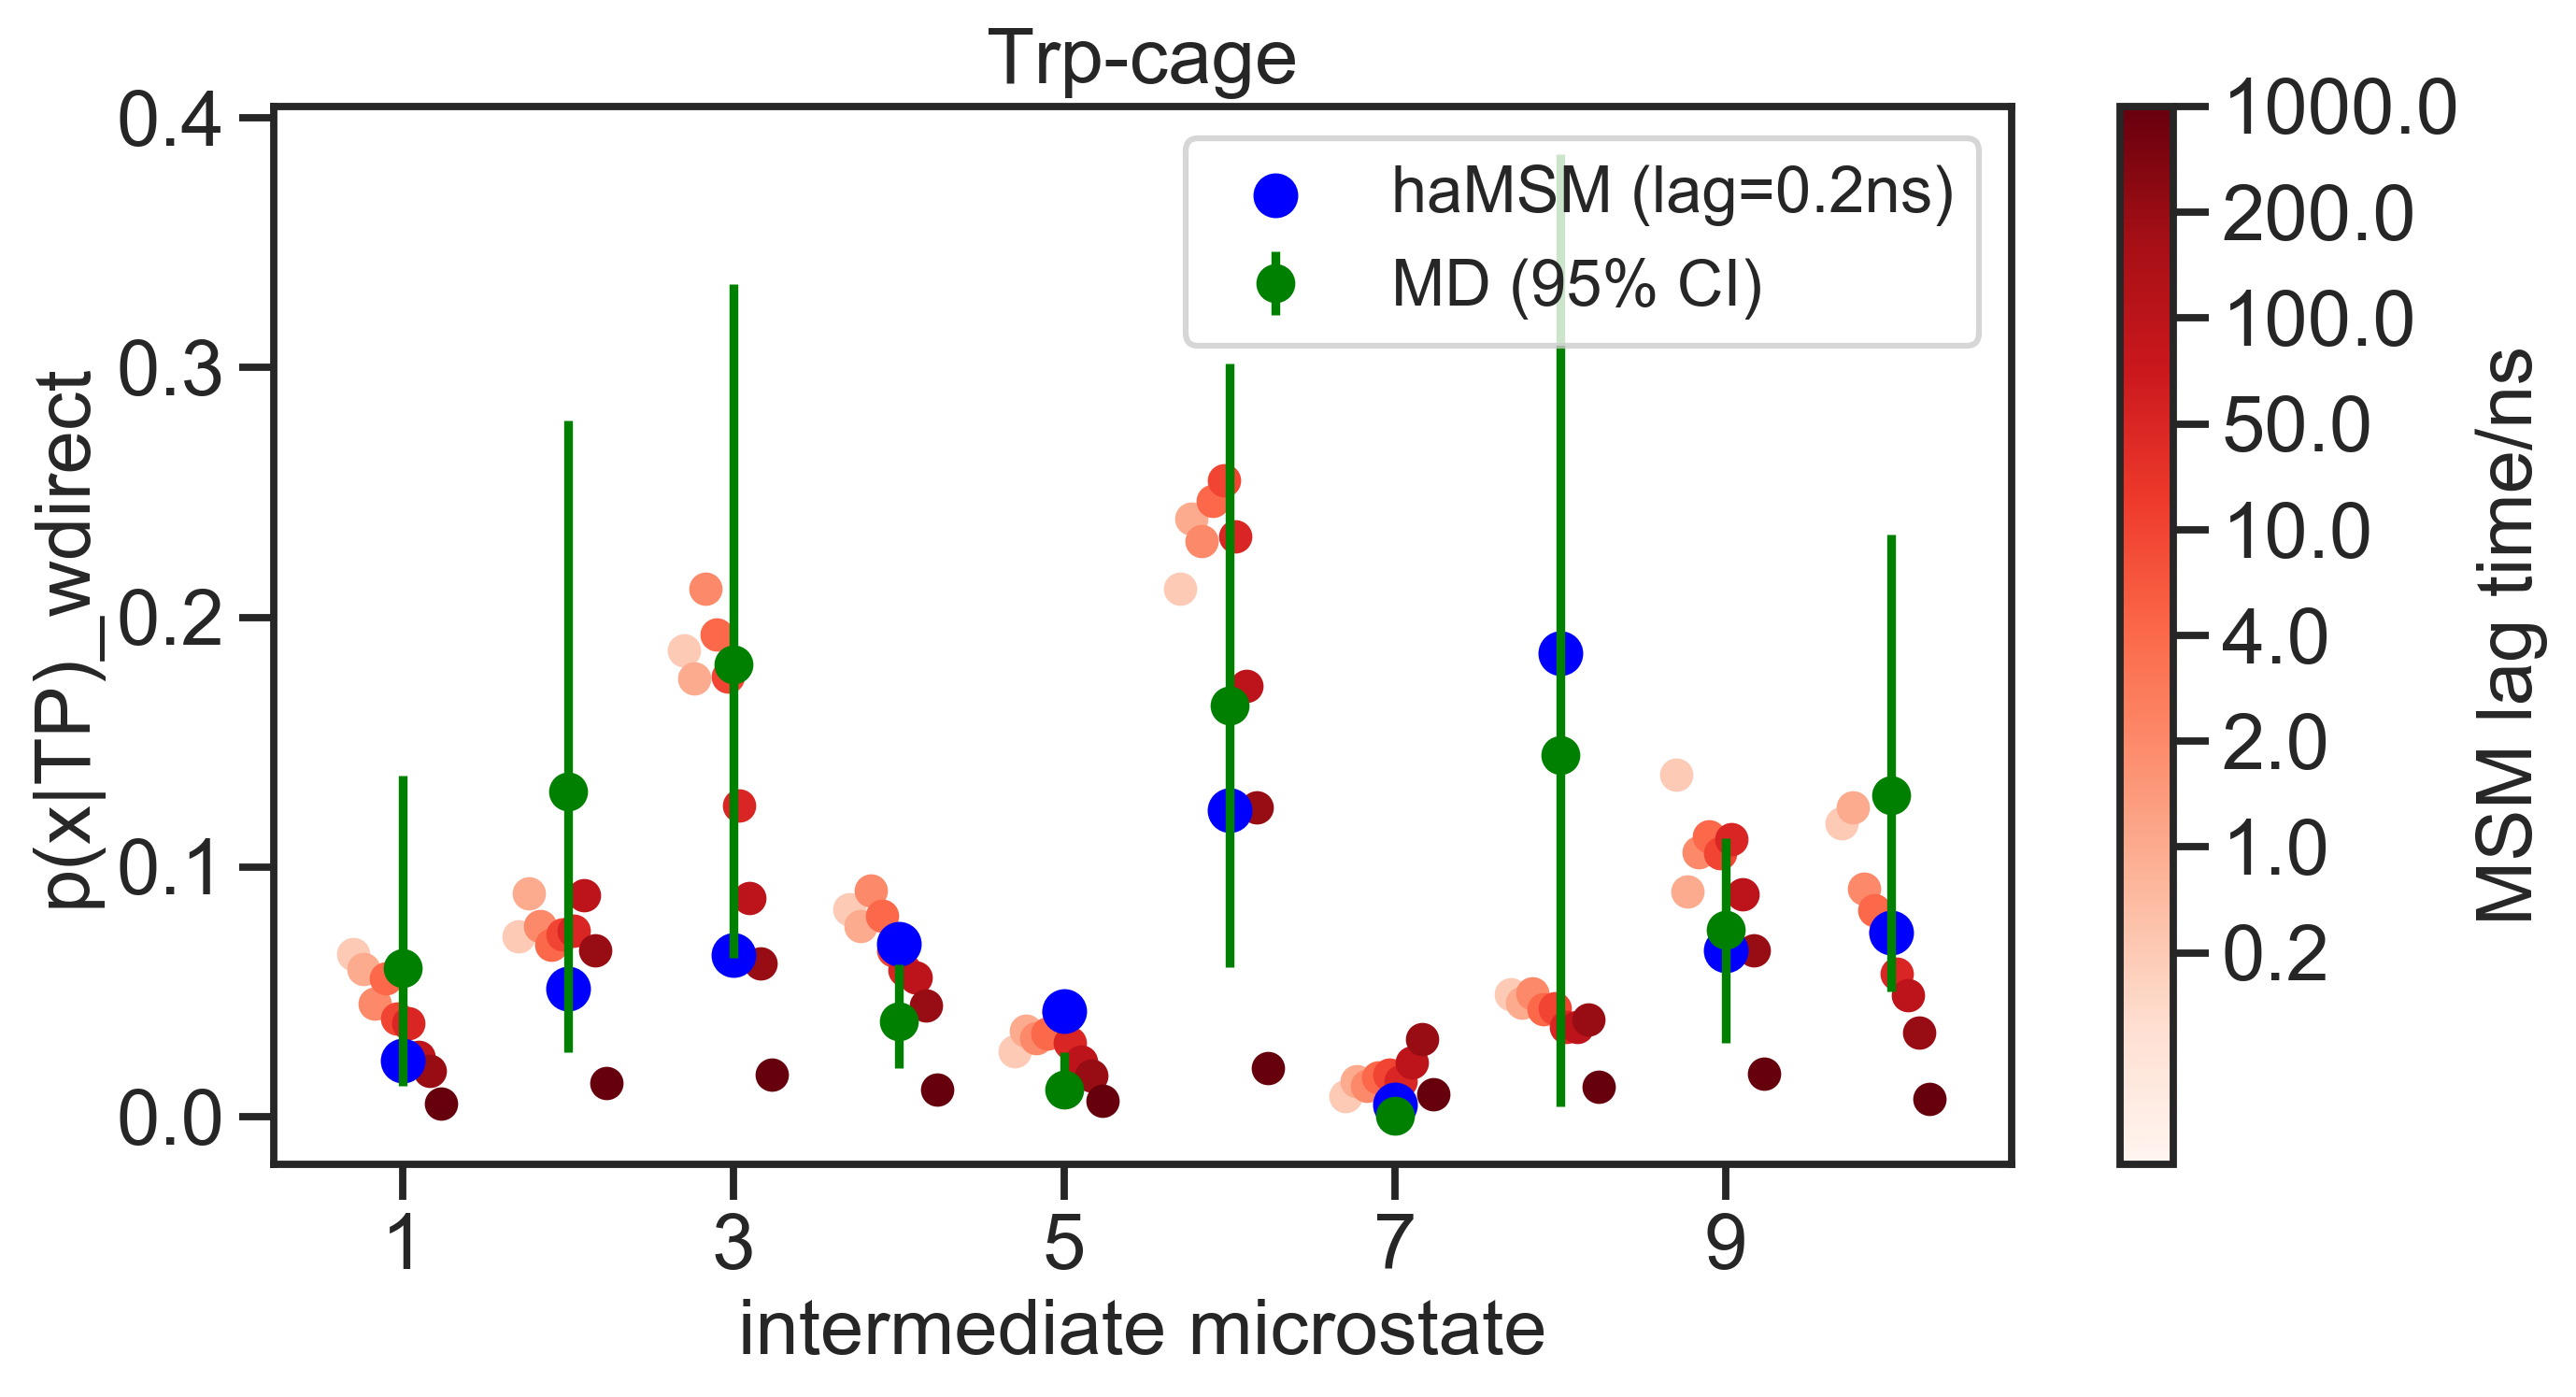

In [62]:
fig = plt.figure(dpi=300, figsize=(10,5))
fig.patch.set_facecolor('white')

norm = matplotlib.colors.Normalize(vmin=-2, vmax=8)
cmap = matplotlib.cm.ScalarMappable(norm=norm, cmap=matplotlib.cm.Reds)
cmap.set_array([])

for msm_index in range(9):
    plt.scatter(np.arange(0.7+0.2*msm_index/3,10.5), counts_msm[msm_index], color=cmap.to_rgba(msm_index), s=50)

cbar = plt.colorbar(cmap)
cbar.set_ticks(range(9))
cbar.set_ticklabels(lags[:9]*0.2)
cbar.set_label('MSM lag time/ns', fontsize=20)
cbar.ax.tick_params(labelsize=20)

plt.errorbar(range(1,11), np.mean(bootstrap_counts, axis=0), yerr=[(np.mean(bootstrap_counts, axis=0)-np.percentile(bootstrap_counts, 2.5, axis=0)), (np.percentile(bootstrap_counts, 97.5, axis=0)-np.mean(bootstrap_counts, axis=0))], color='green', label='MD (95% CI)', fmt='o')

plt.scatter(np.arange(1,11), counts_nm, color='blue', label='haMSM (lag=0.2ns)', s=100)

plt.xlabel('intermediate microstate', fontsize=20)
plt.ylabel('p(x|TP)_wdirect', fontsize=20)
plt.xticks(np.arange(1,11,2), np.arange(1,10,2), fontsize=20)
plt.yticks(np.arange(0, 0.5, 0.1), fontsize=20)
plt.title('Trp-cage', fontsize=20)
plt.legend()

plt.show()

In [63]:
[kl_divergence(np.mean(bootstrap_counts, axis=0), counts_msm[i]) + kl_divergence(counts_msm[i], np.mean(bootstrap_counts, axis=0)) for i in range(9)]

[0.26492568913992187,
 0.2707147626664318,
 0.30088037550150193,
 0.35289221998878406,
 0.37197477539620805,
 0.3942686647667309,
 0.46025170109264885,
 0.6531041112795527,
 1.9372324670146186]

In [64]:
kl_divergence(np.mean(bootstrap_counts, axis=0), counts_nm) + kl_divergence(counts_nm, np.mean(bootstrap_counts, axis=0))

0.35896020621357727

In [65]:
np.array([rmse(np.mean(bootstrap_counts, axis=0), counts_msm[i]) for i in range(9)])*100

array([ 4.59258894,  4.42283303,  4.8138247 ,  5.20408679,  5.30054001,
        5.53631353,  5.59115768,  6.57185901, 10.06681873])

In [66]:
rmse(np.mean(bootstrap_counts, axis=0), counts_nm)*100

5.4533097526525625

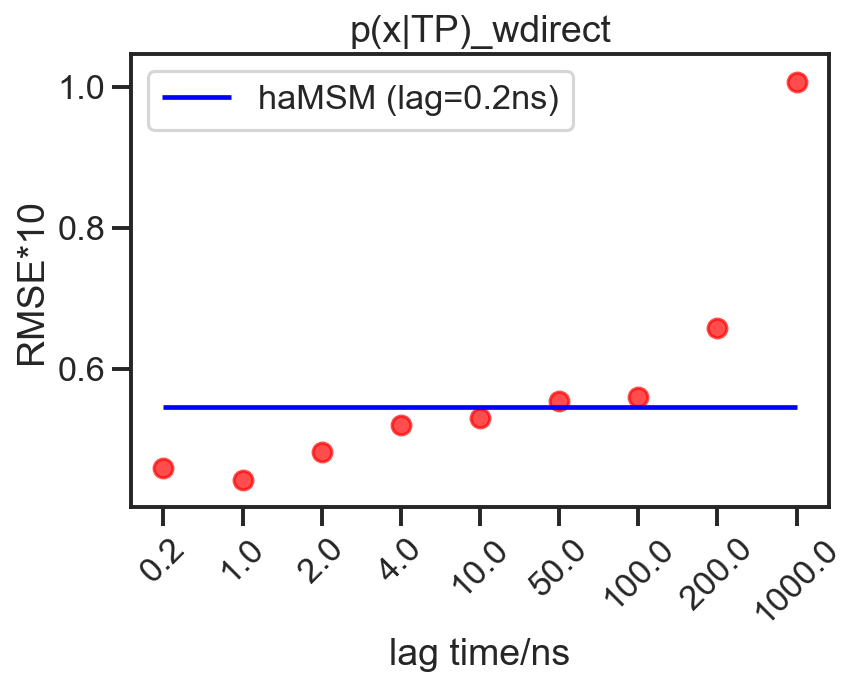

In [67]:
plt.figure(dpi=150)
plt.scatter(range(9), np.array([rmse(np.mean(bootstrap_counts, axis=0), counts_msm[i]) for i in range(9)])*10, color='red', alpha=0.7)
plt.xlabel('lag time/ns')
plt.xticks(range(9), lags*0.2, rotation=45)
plt.ylabel('RMSE*10')
plt.title('p(x|TP)_wdirect')
plt.hlines(rmse(np.mean(bootstrap_counts, axis=0), counts_nm)*10, 0, 8, color='blue', label='haMSM (lag=0.2ns)')
plt.legend()
plt.show()

## Fundamental Sequences

In [77]:
nm_model = NonMarkovModel(dtrajs, stateA, stateB, lag_time=1, coarse_macrostates=True)

In [78]:
ens = DiscretePathEnsemble.from_ensemble(nm_model, nm_model.stateA, nm_model.stateB)

In [79]:
len(ens.trajectories)

168

In [80]:
fs = ens._fundamental_sequences(nm_model.markov_tmatrix)

In [82]:
mdFS, mdFSweights, _ = nm_model.empirical_weighted_FS()

In [85]:
mdFS_bootstrap = []
mdFSweights_bootstrap = []

for boostrap in range(1000):
    fs_ = np.random.choice(fs, len(fs))
    FS, FSweights = weighted_fundamental_sequences_md(fs_)
    mdFS_bootstrap.append(FS)
    mdFSweights_bootstrap.append(FSweights)

In [86]:
mdFSweights_bootstrap_padded = []

mdFS_indexdict = dict()

for i,seq in enumerate(mdFS):
    mdFS_indexdict[seq] = i

for i,seqs in enumerate(mdFS_bootstrap):
    mdFSweights_bootstrap_padded.append([0 for x in range(len(mdFS))])
    for j,seq in enumerate(seqs):
        mdFSweights_bootstrap_padded[-1][mdFS_indexdict[seq]] = mdFSweights_bootstrap[i][j]

In [87]:
#mdFS, mdFSweights, _ = nm_model.empirical_weighted_FS()

nmFS, nmFSweights, _ = nm_model.weighted_FS(n_paths=2000)


nm_model.markovian = True


msmFS, msmFSweights, _ = nm_model.weighted_FS(n_paths=2000)

nm_model.lag_time = 5
msmFS_5, msmFSweights_5, _ = nm_model.weighted_FS(n_paths=2000)

nm_model.lag_time = 10
msmFS_10, msmFSweights_10, _ = nm_model.weighted_FS(n_paths=2000)

nm_model.lag_time = 20
msmFS_20, msmFSweights_20, _ = nm_model.weighted_FS(n_paths=2000)

nm_model.lag_time = 50
msmFS_50, msmFSweights_50, _ = nm_model.weighted_FS(n_paths=2000)

nm_model.lag_time = 250
msmFS_250, msmFSweights_250, _ = nm_model.weighted_FS(n_paths=20000)

nm_model.lag_time = 500
msmFS_500, msmFSweights_500, _ = nm_model.weighted_FS(n_paths=20000)

nm_model.lag_time = 1000
msmFS_1000, msmFSweights_1000, _ = nm_model.weighted_FS(n_paths=100000)

nm_model.lag_time = 5000
msmFS_5000, msmFSweights_5000, _ = nm_model.weighted_FS(n_paths=100000)


nm_model.lag_time = 1
nm_model.markovian = False

In [88]:
nmFSweights_temp = []

msmFSweights_temp = []
msmFSweights_temp_5 = []
msmFSweights_temp_10 = []
msmFSweights_temp_20 = []
msmFSweights_temp_50 = []
msmFSweights_temp_250 = []
msmFSweights_temp_500 = []
msmFSweights_temp_1000 = []
msmFSweights_temp_5000 = []

for i, element in enumerate(mdFS):
    
    # lag=1
    if element in nmFS:
        nmFSweights_temp.append(nmFSweights[nmFS.index(element)])
    else:
        nmFSweights_temp.append(0)
    
    if element in msmFS:
        msmFSweights_temp.append(msmFSweights[msmFS.index(element)])
    else:
        msmFSweights_temp.append(0)
        
    # lag=5
    if element in msmFS_5:
        msmFSweights_temp_5.append(msmFSweights_5[msmFS_5.index(element)])
    else:
        msmFSweights_temp_5.append(0)   
    
    # lag=10
    if element in msmFS_10:
        msmFSweights_temp_10.append(msmFSweights_10[msmFS_10.index(element)])
    else:
        msmFSweights_temp_10.append(0)
        
    # lag=20
    if element in msmFS_20:
        msmFSweights_temp_20.append(msmFSweights_20[msmFS_20.index(element)])
    else:
        msmFSweights_temp_20.append(0)
    
    # lag=50
    if element in msmFS_50:
        msmFSweights_temp_50.append(msmFSweights_50[msmFS_50.index(element)])
    else:
        msmFSweights_temp_50.append(0)

    # lag=250
    if element in msmFS_250:
        msmFSweights_temp_250.append(msmFSweights_250[msmFS_250.index(element)])
    else:
        msmFSweights_temp_250.append(0)
        
    # lag=500
    if element in msmFS_500:
        msmFSweights_temp_500.append(msmFSweights_500[msmFS_500.index(element)])
    else:
        msmFSweights_temp_500.append(0)    
    
    # lag=1000
    if element in msmFS_1000:
        msmFSweights_temp_1000.append(msmFSweights_1000[msmFS_1000.index(element)])
    else:
        msmFSweights_temp_1000.append(0)
        
    # lag=5000
    if element in msmFS_5000:
        msmFSweights_temp_5000.append(msmFSweights_5000[msmFS_5000.index(element)])
    else:
        msmFSweights_temp_5000.append(0)
        
msmFSweights_temp_all = [msmFSweights_temp,msmFSweights_temp_5,msmFSweights_temp_10,msmFSweights_temp_20,msmFSweights_temp_50,msmFSweights_temp_250,msmFSweights_temp_500,msmFSweights_temp_1000,msmFSweights_temp_5000]        

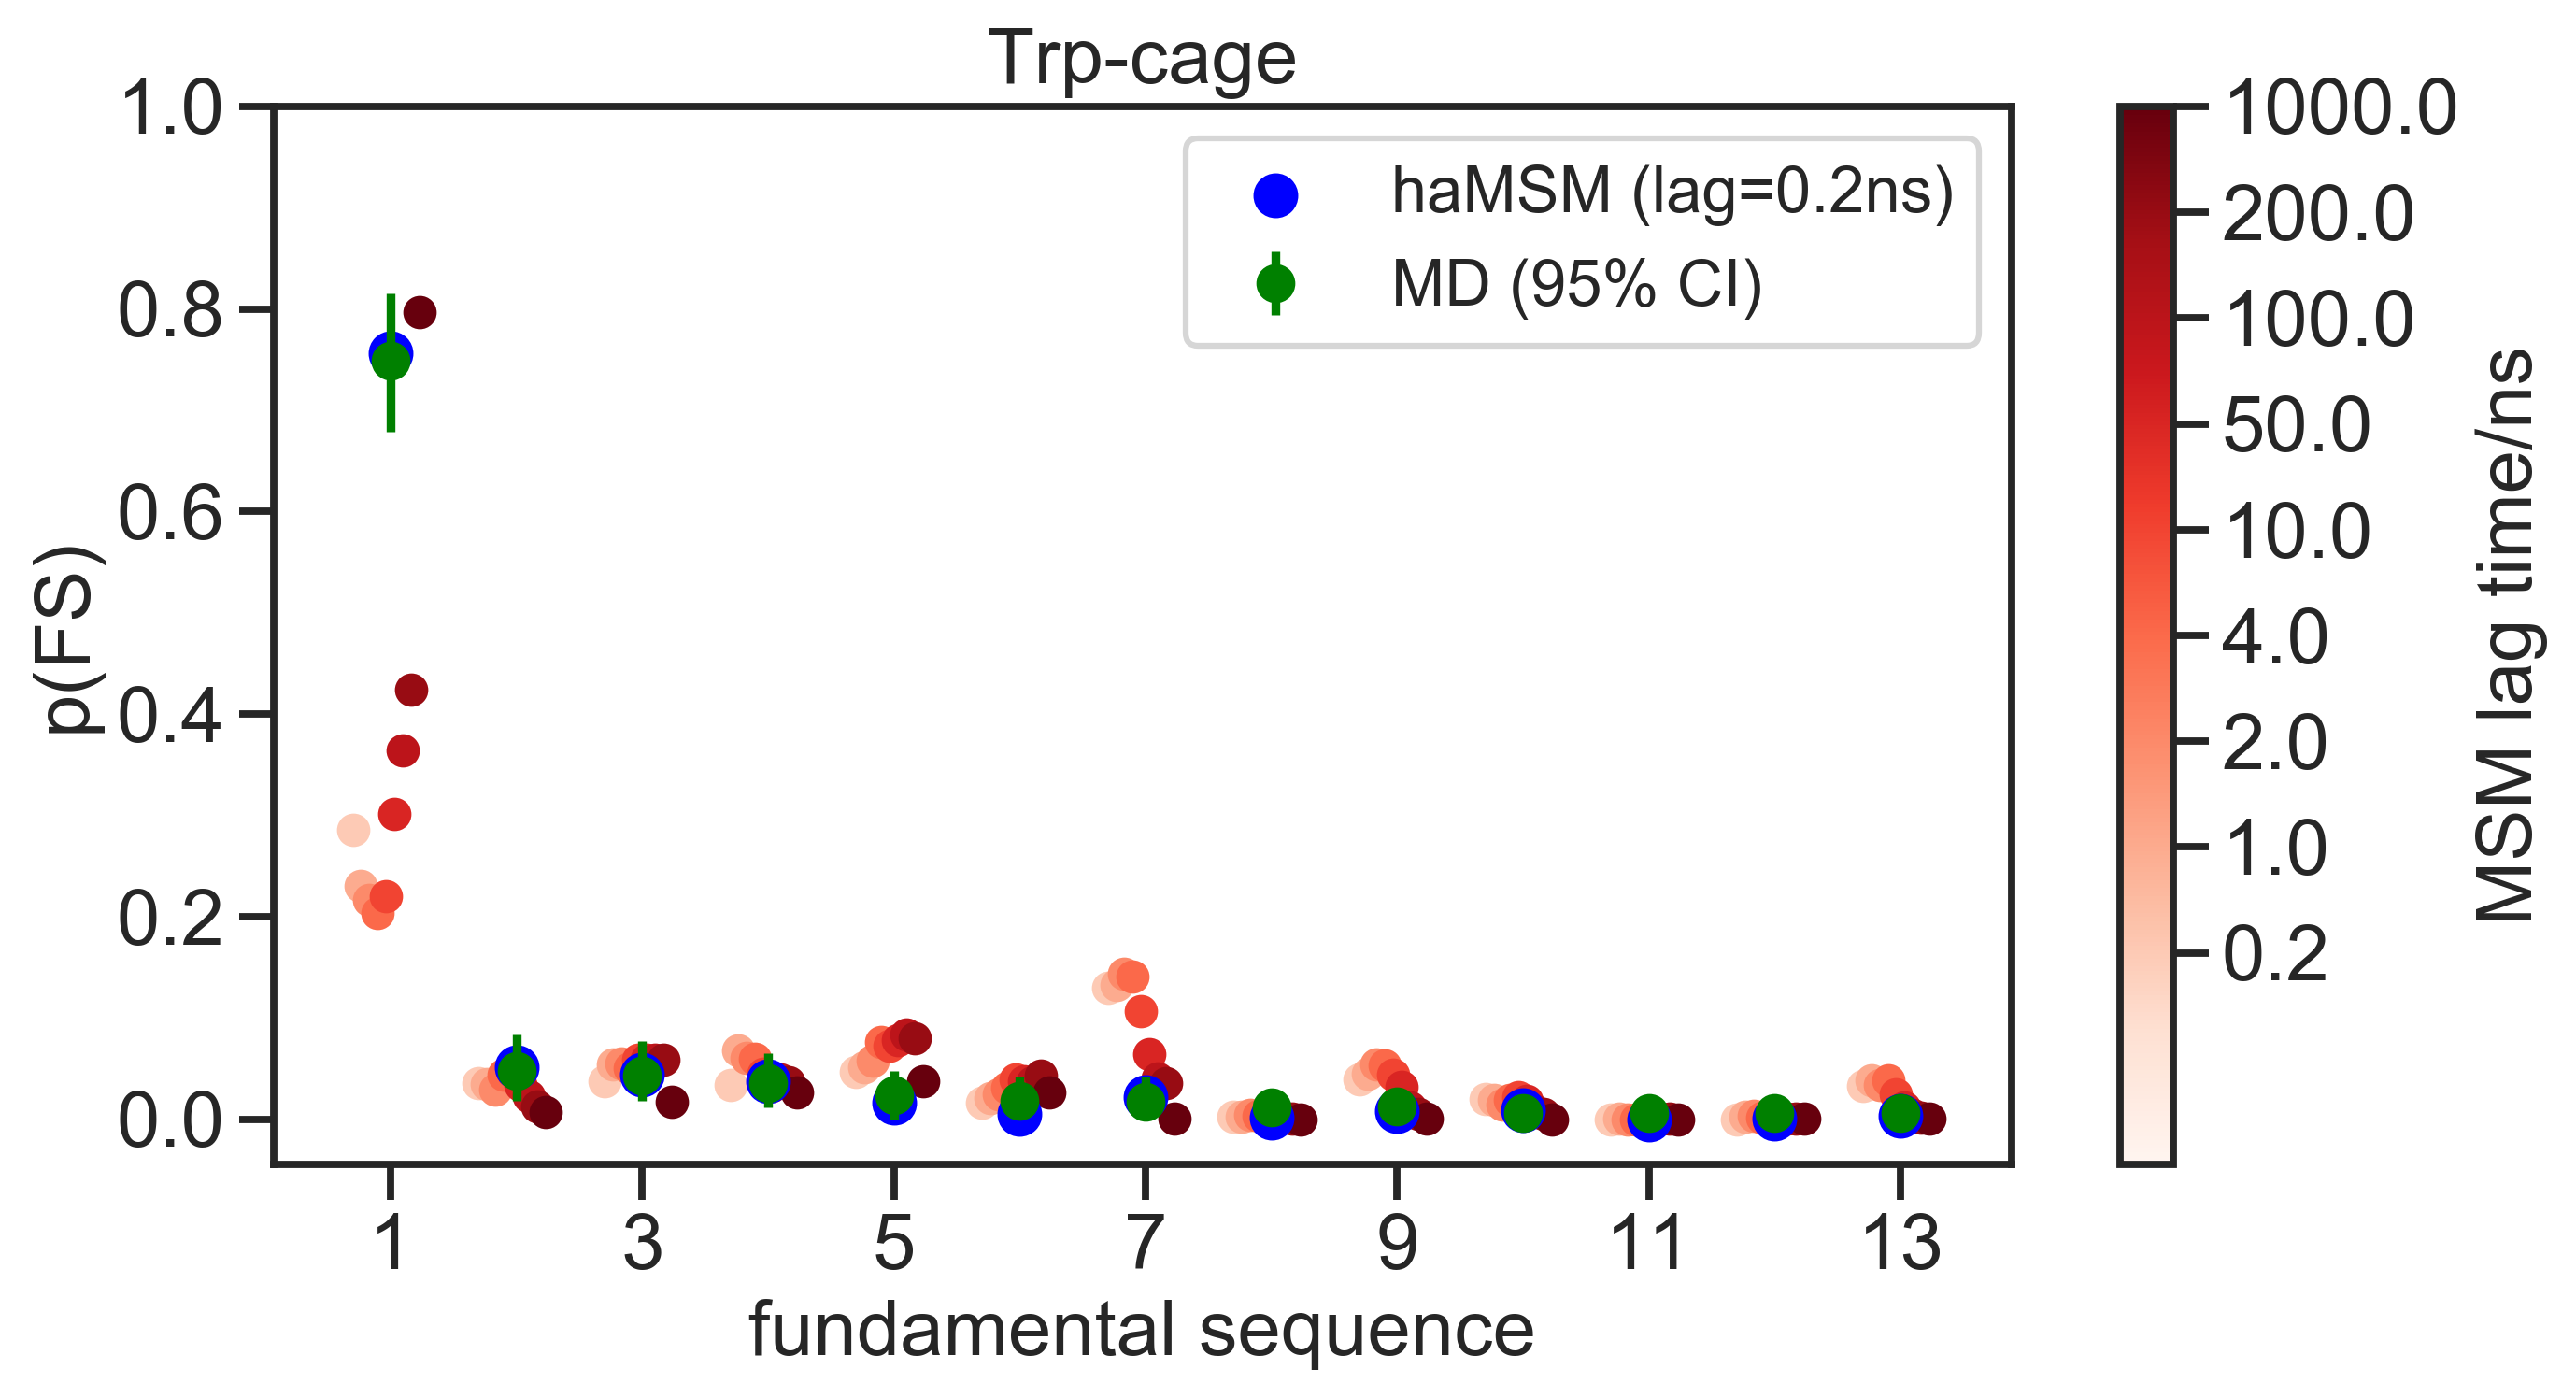

In [89]:
fig = plt.figure(dpi=300, figsize=(10,5))
fig.patch.set_facecolor('white')

norm = matplotlib.colors.Normalize(vmin=-2, vmax=8)
cmap = matplotlib.cm.ScalarMappable(norm=norm, cmap=matplotlib.cm.Reds)
cmap.set_array([])

for msm_index in range(9):
    plt.scatter(np.arange(0.7+0.2*msm_index/3,13.5), msmFSweights_temp_all[msm_index][:13], color=cmap.to_rgba(msm_index), s=50)

cbar = plt.colorbar(cmap)
cbar.set_ticks(range(9))
cbar.set_ticklabels(lags[:9]*0.2)
cbar.set_label('MSM lag time/ns', fontsize=20)
cbar.ax.tick_params(labelsize=20)

plt.errorbar(range(1,14), np.mean(mdFSweights_bootstrap_padded, axis=0)[:13], yerr=[(np.mean(mdFSweights_bootstrap_padded, axis=0)-np.percentile(mdFSweights_bootstrap_padded, 2.5, axis=0))[:13], (np.percentile(mdFSweights_bootstrap_padded, 97.5, axis=0)-np.mean(mdFSweights_bootstrap_padded, axis=0))[:13]], fmt='o', color='green', label='MD (95% CI)')

plt.scatter(np.arange(1,14), nmFSweights_temp[:13], color='blue', label='haMSM (lag=0.2ns)', s=100)

plt.xlabel('fundamental sequence', fontsize=20)
plt.ylabel('p(FS)', fontsize=20)
plt.xticks(np.arange(1,14,2), np.arange(1,14,2), fontsize=20)
plt.yticks(np.arange(0, 1.2, 0.2), fontsize=20)
plt.title('Trp-cage', fontsize=20)
plt.legend()

plt.show()

In [90]:
np.array([rmse(np.mean(mdFSweights_bootstrap_padded, axis=0), msmFSweights_temp_all[i]) for i in range(9)])*100

array([11.98196924, 13.39879411, 13.79963449, 14.13133396, 13.52164991,
       11.38721462,  9.81818513,  8.36370269,  1.88227662])

In [91]:
rmse(np.mean(mdFSweights_bootstrap_padded, axis=0), nmFSweights_temp)*100

0.6129018635749062

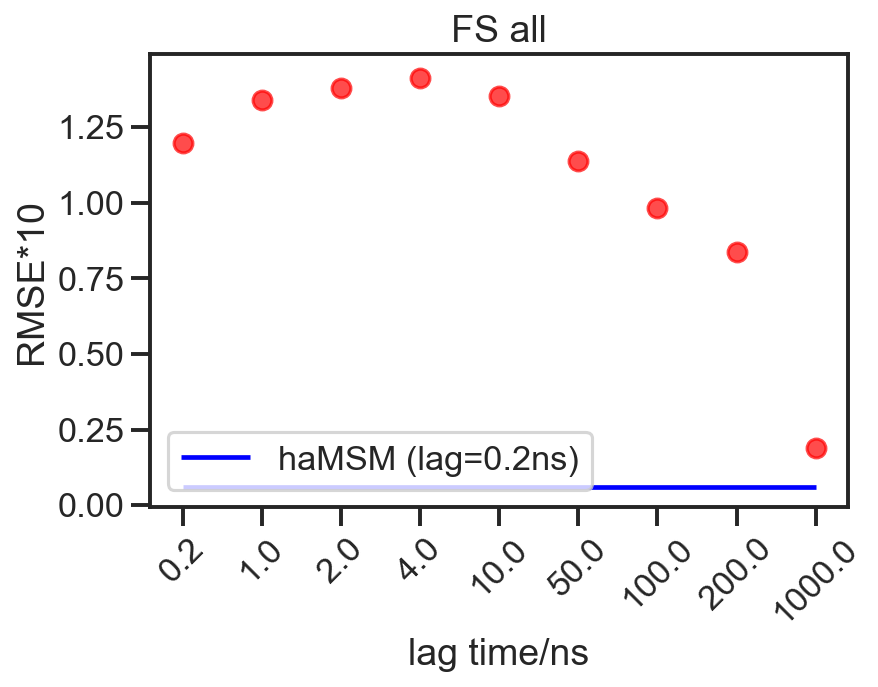

In [92]:
plt.figure(dpi=150)
plt.scatter(range(9), np.array([rmse(np.mean(mdFSweights_bootstrap_padded, axis=0), msmFSweights_temp_all[i]) for i in range(9)])*10, color='red', alpha=0.7)
plt.xlabel('lag time/ns')
plt.xticks(range(9), lags*0.2, rotation=45)
plt.ylabel('RMSE*10')
plt.title('FS all')
plt.hlines(rmse(np.mean(mdFSweights_bootstrap_padded, axis=0), nmFSweights_temp)*10, 0, 8, color='blue', label='haMSM (lag=0.2ns)')
plt.legend()
plt.show()

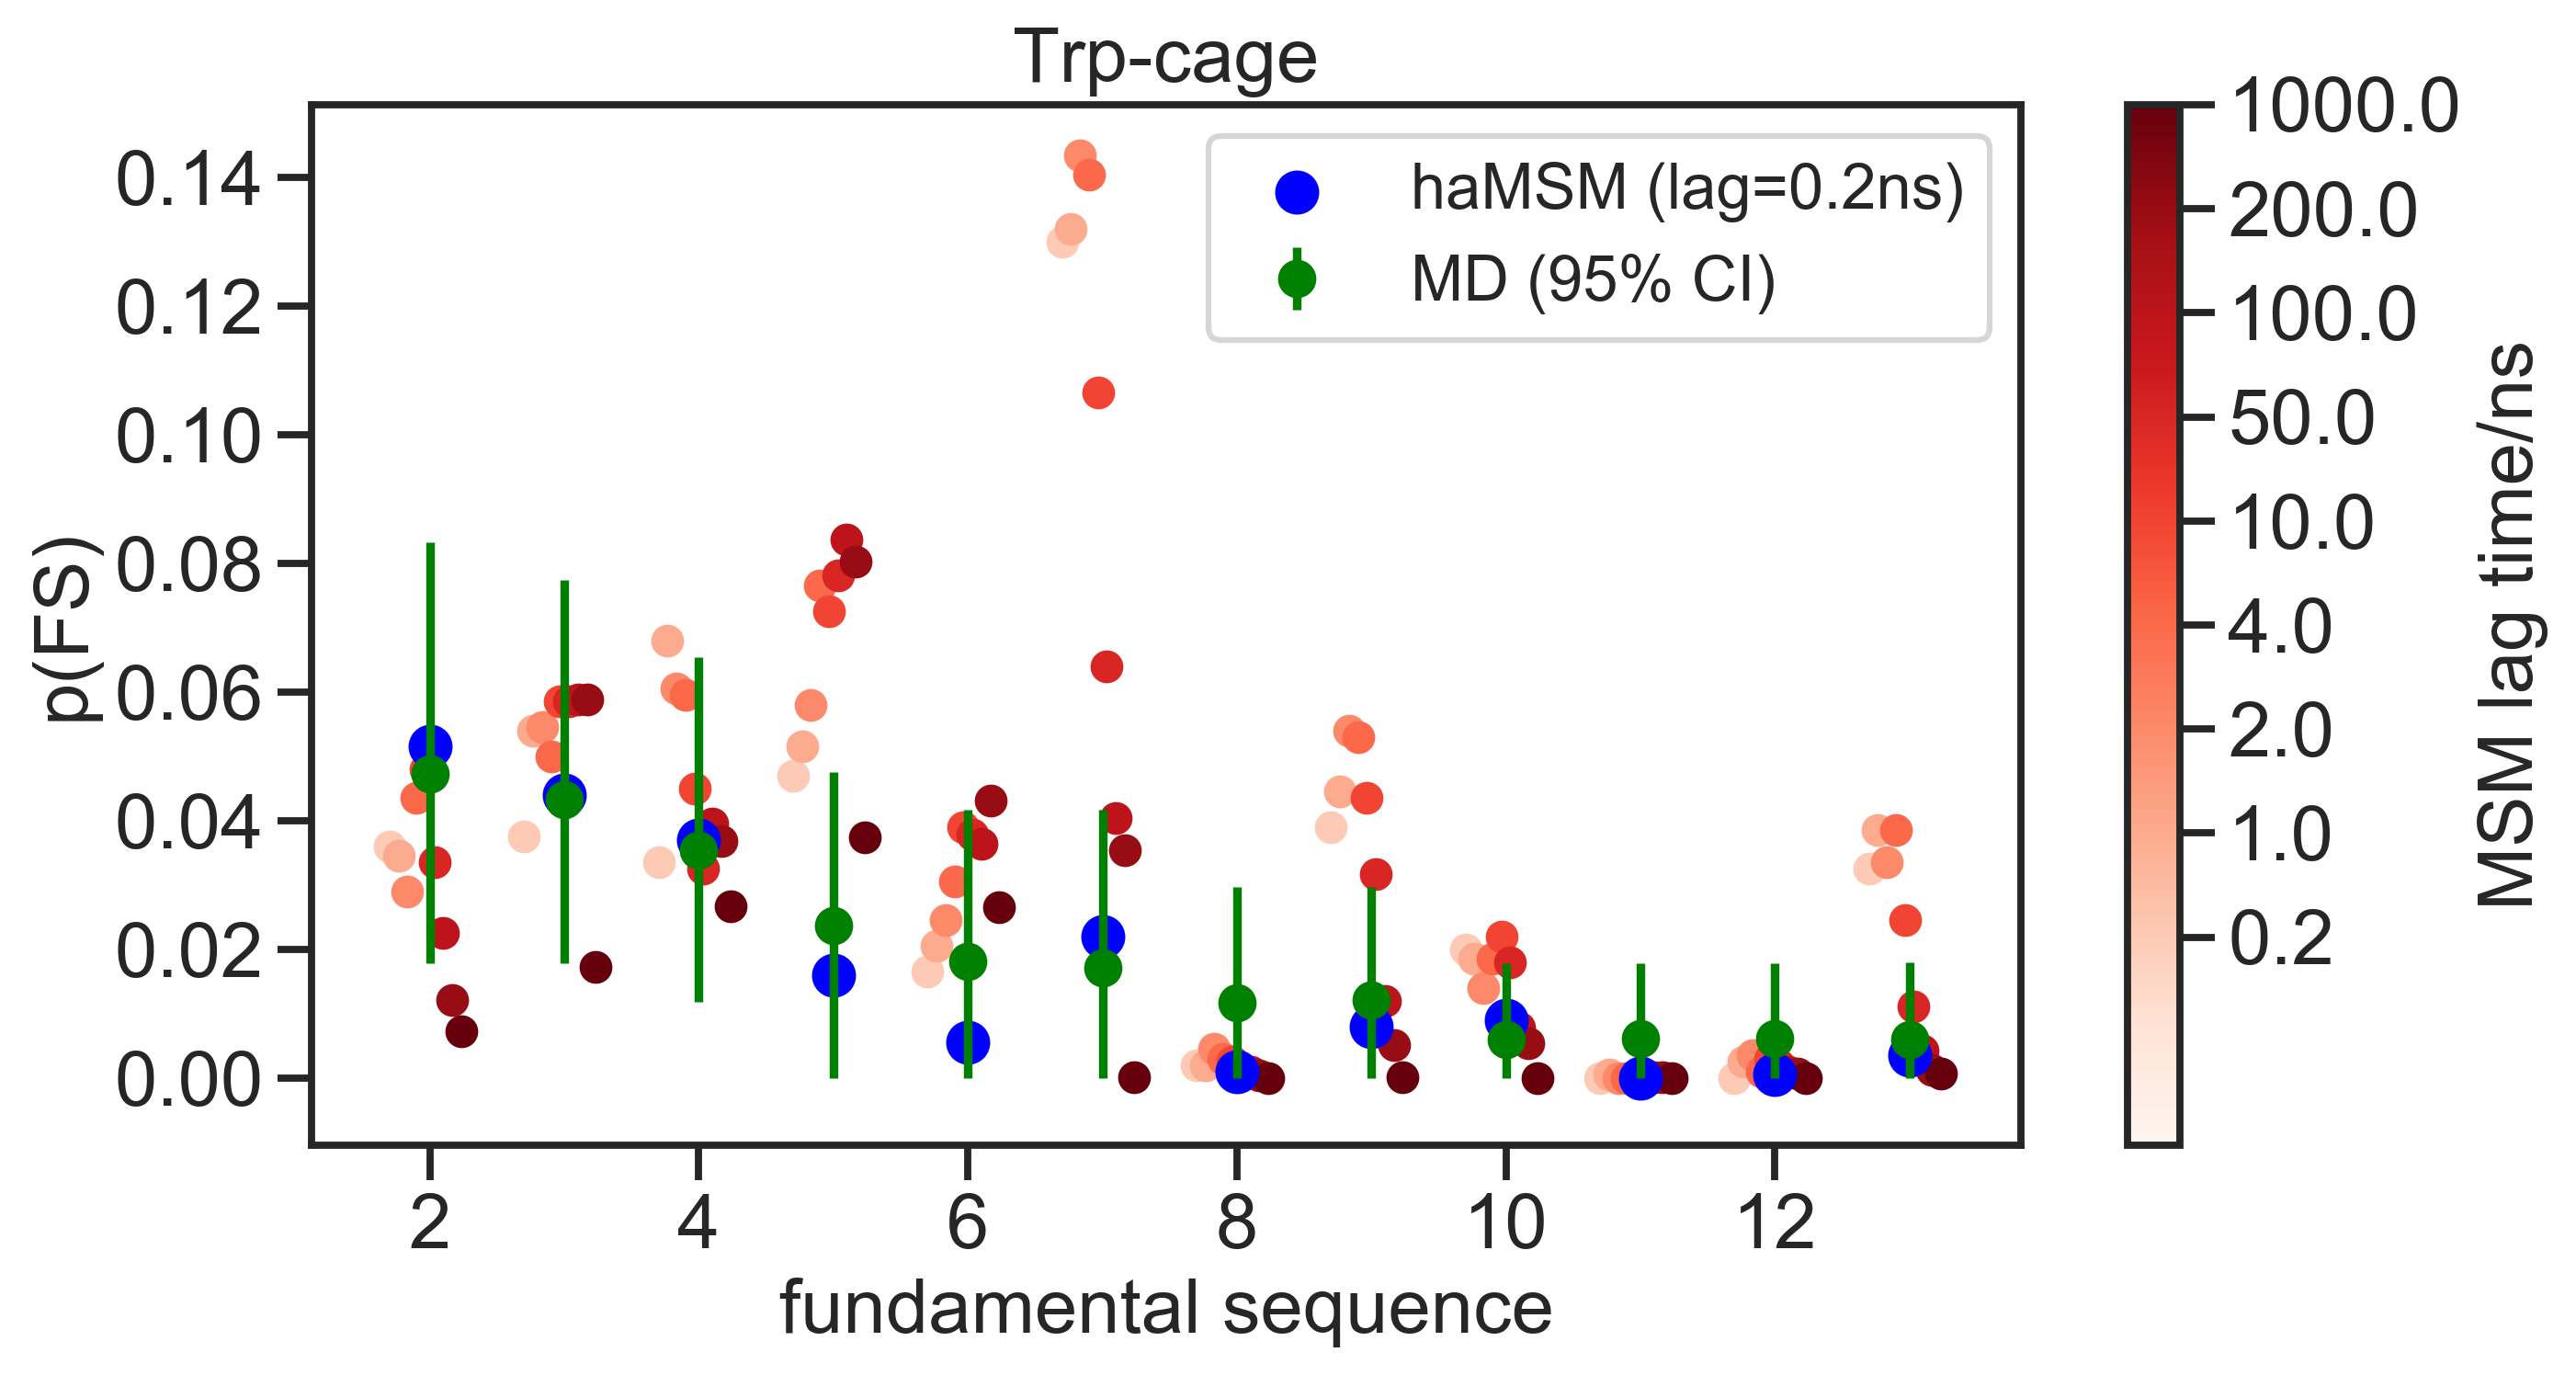

In [103]:
fig = plt.figure(dpi=300, figsize=(10,5))
fig.patch.set_facecolor('white')

norm = matplotlib.colors.Normalize(vmin=-2, vmax=8)
cmap = matplotlib.cm.ScalarMappable(norm=norm, cmap=matplotlib.cm.Reds)
cmap.set_array([])

for msm_index in range(9):
    plt.scatter(np.arange(1.7+0.2*msm_index/3,13.5), msmFSweights_temp_all[msm_index][1:13], color=cmap.to_rgba(msm_index), s=50)

cbar = plt.colorbar(cmap)
cbar.set_ticks(range(9))
cbar.set_ticklabels(lags[:9]*0.2)
cbar.set_label('MSM lag time/ns', fontsize=20)
cbar.ax.tick_params(labelsize=20)

plt.errorbar(range(2,14), np.mean(mdFSweights_bootstrap_padded, axis=0)[1:13], yerr=[(np.mean(mdFSweights_bootstrap_padded, axis=0)-np.percentile(mdFSweights_bootstrap_padded, 2.5, axis=0))[1:13], (np.percentile(mdFSweights_bootstrap_padded, 97.5, axis=0)-np.mean(mdFSweights_bootstrap_padded, axis=0))[1:13]], fmt='o', color='green', label='MD (95% CI)')

plt.scatter(np.arange(2,14), nmFSweights_temp[1:13], color='blue', label='haMSM (lag=0.2ns)', s=100)

plt.xlabel('fundamental sequence', fontsize=20)
plt.ylabel('p(FS)', fontsize=20)
plt.xticks(np.arange(2,14,2), np.arange(2,14,2), fontsize=20)
plt.yticks(np.arange(0, 0.15, 0.02), fontsize=20)
plt.title('Trp-cage', fontsize=20)
plt.legend()

plt.show()

In [94]:
np.array([rmse(np.mean(mdFSweights_bootstrap_padded, axis=0)[1:], msmFSweights_temp_all[i][1:]) for i in range(9)])*100

array([3.19092371, 3.44568773, 3.74660138, 3.81778083, 2.96066106,
       2.15570542, 1.94681571, 2.00171806, 1.50137097])

In [95]:
rmse(np.mean(mdFSweights_bootstrap_padded, axis=0)[1:], nmFSweights_temp[1:])*100

0.603243586802962

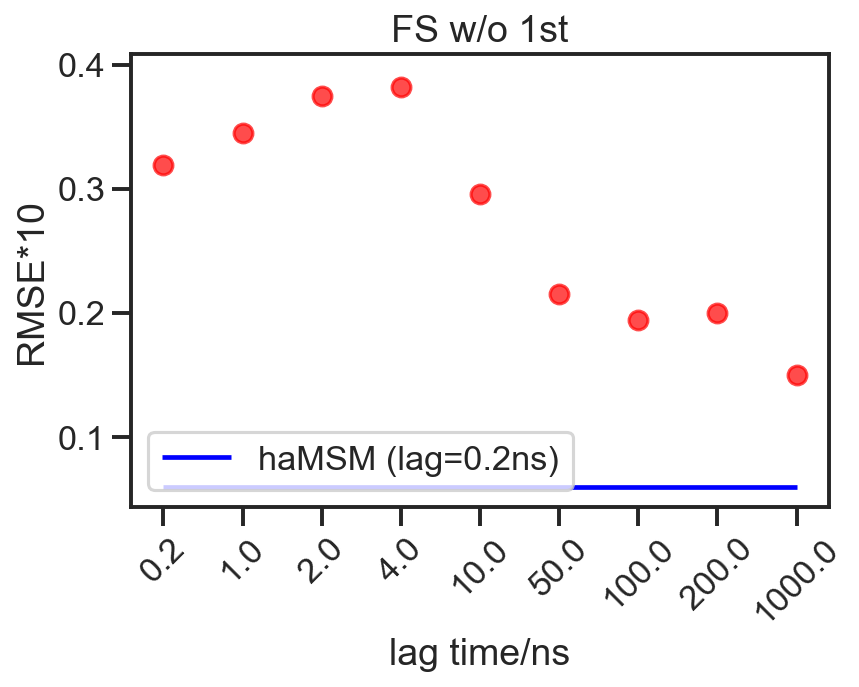

In [96]:
plt.figure(dpi=150)
plt.scatter(range(9), np.array([rmse(np.mean(mdFSweights_bootstrap_padded, axis=0)[1:], msmFSweights_temp_all[i][1:]) for i in range(9)])*10, color='red', alpha=0.7)
plt.xlabel('lag time/ns')
plt.xticks(range(9), lags*0.2, rotation=45)
plt.ylabel('RMSE*10')
plt.title('FS w/o 1st')
plt.hlines(rmse(np.mean(mdFSweights_bootstrap_padded, axis=0)[1:], nmFSweights_temp[1:])*10, 0, 8, color='blue', label='haMSM (lag=0.2ns)')
plt.legend()
plt.show()

In [97]:
# re-normalize without the first (direct) pathway

In [98]:
mdFSweights_bootstrap_padded_renorm = [i[1:]/np.sum(i[1:]) for i in mdFSweights_bootstrap_padded]

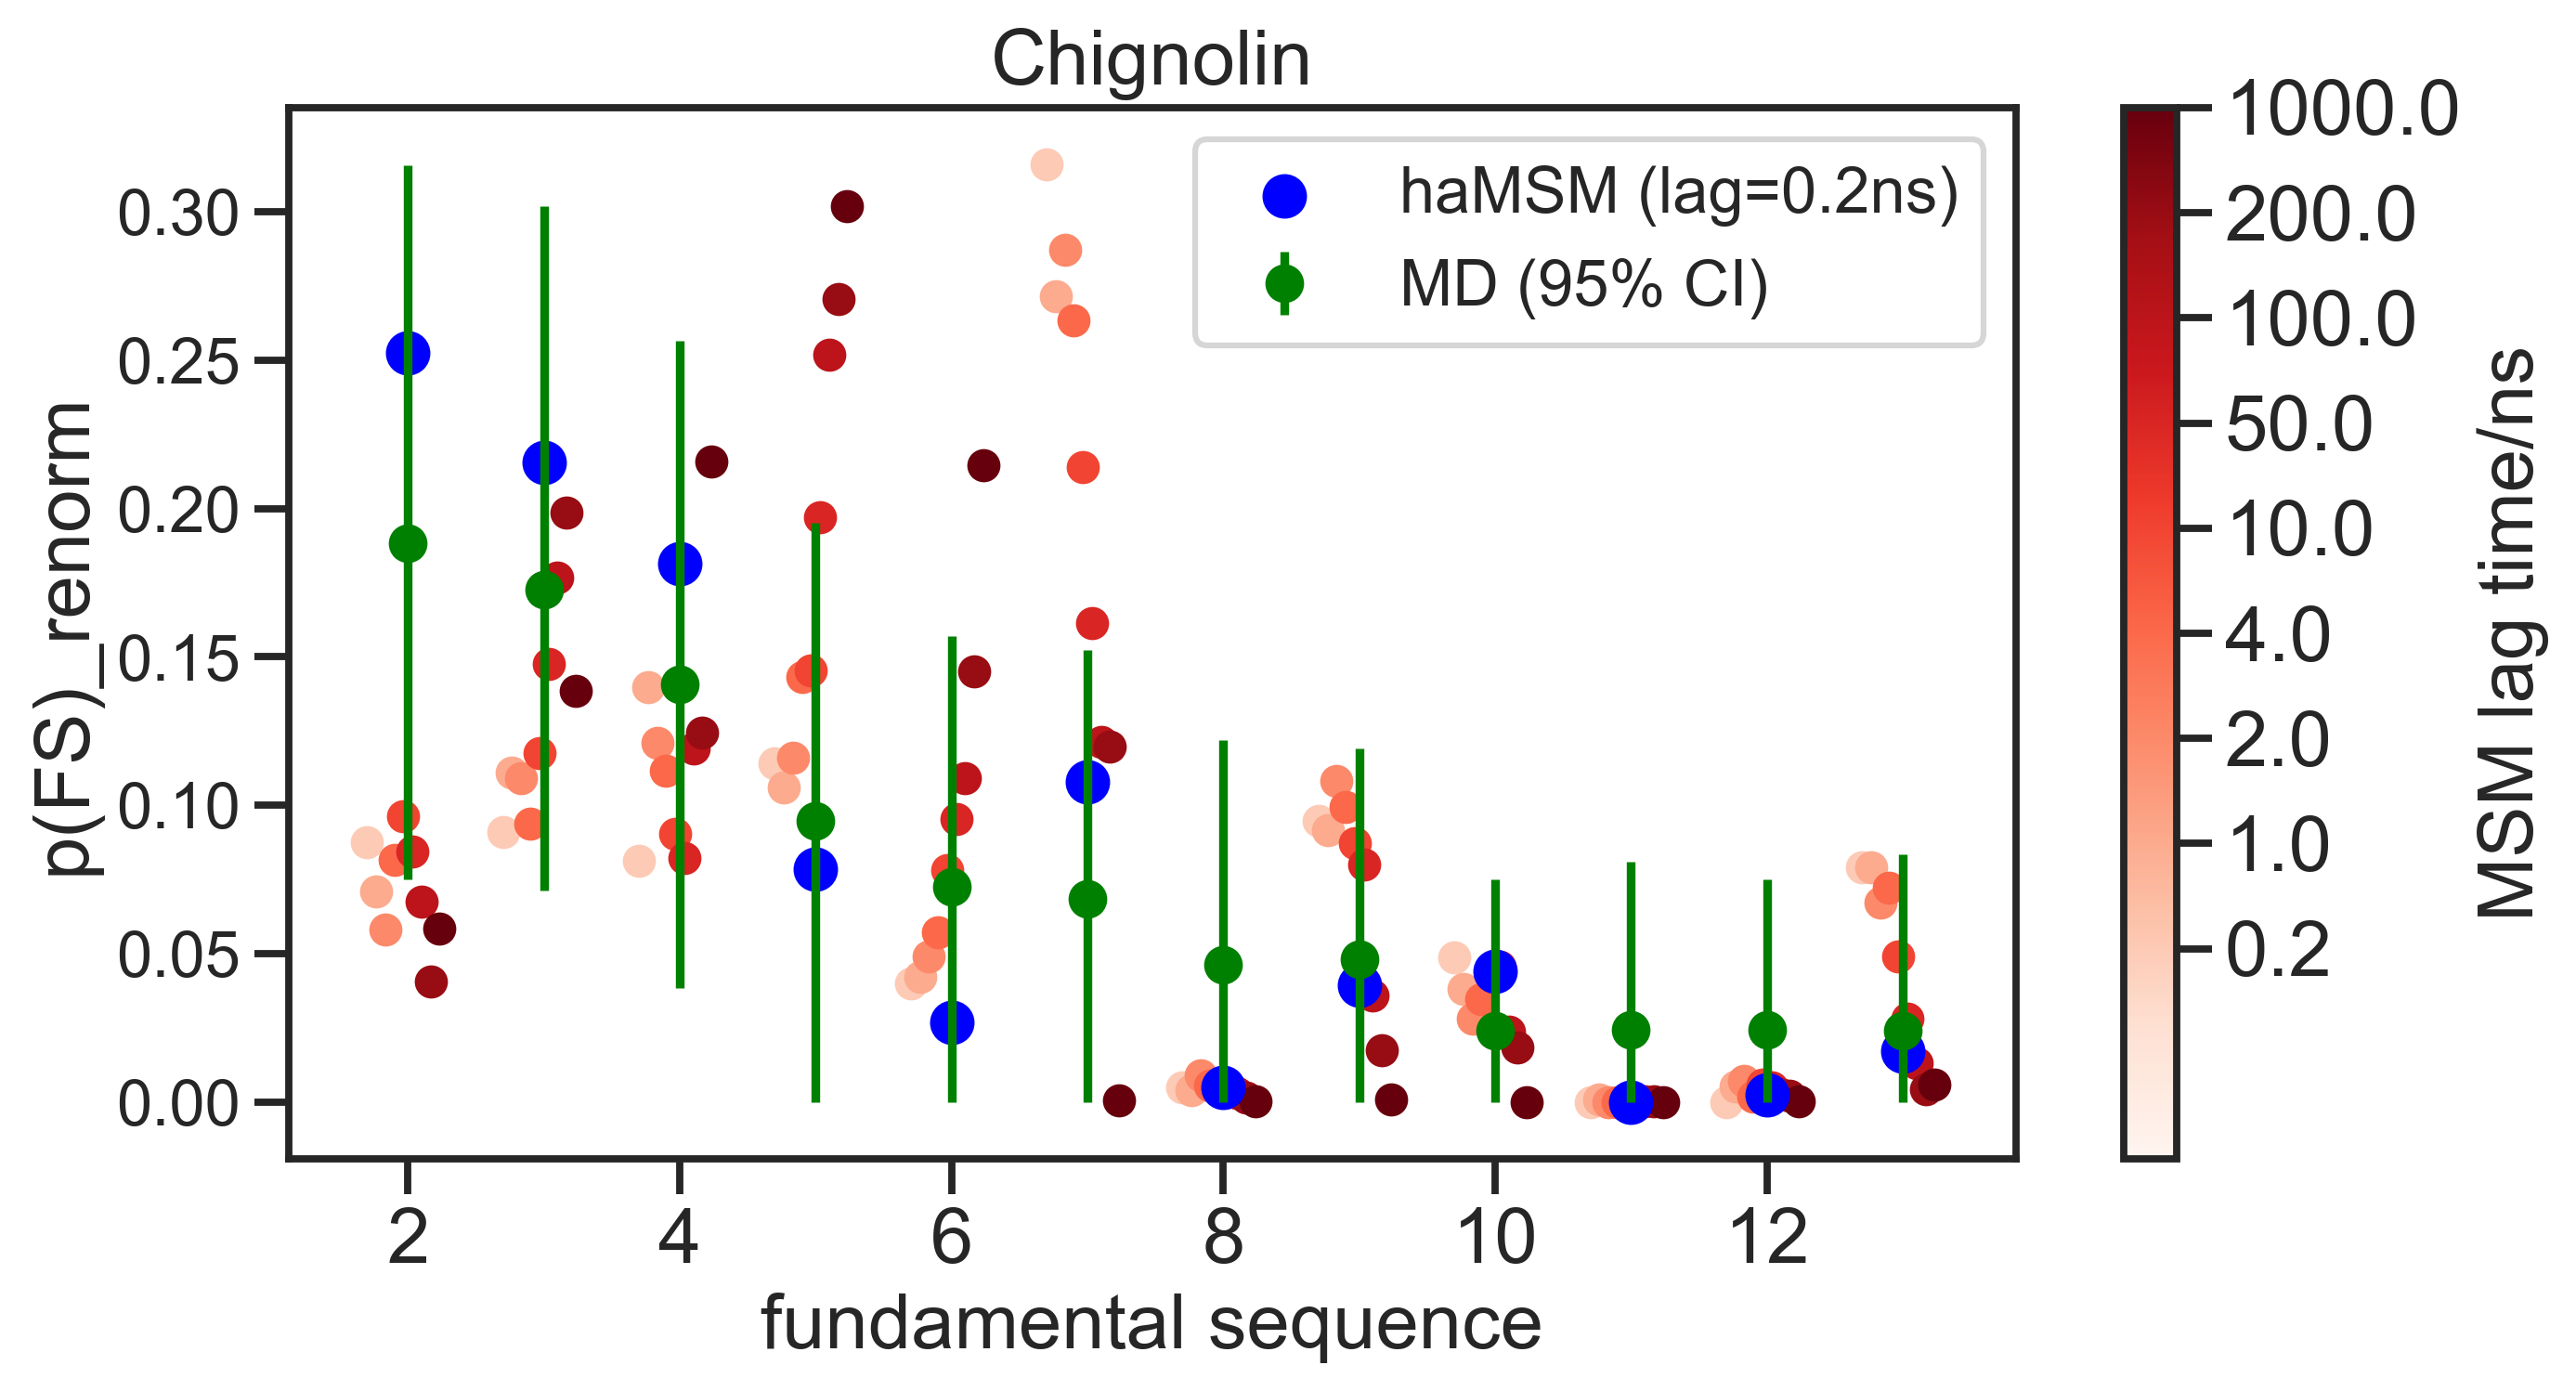

In [99]:
fig = plt.figure(dpi=300, figsize=(10,5))
fig.patch.set_facecolor('white')

norm = matplotlib.colors.Normalize(vmin=-2, vmax=8)
cmap = matplotlib.cm.ScalarMappable(norm=norm, cmap=matplotlib.cm.Reds)
cmap.set_array([])

for msm_index in range(9):
    plt.scatter(np.arange(1.7+0.2*msm_index/3,13.5), (msmFSweights_temp_all[msm_index][1:]/np.sum(msmFSweights_temp_all[msm_index][1:]))[:12], color=cmap.to_rgba(msm_index), s=50)

cbar = plt.colorbar(cmap)
cbar.set_ticks(range(9))
cbar.set_ticklabels(lags[:9]*0.2)
cbar.set_label('MSM lag time/ns', fontsize=20)
cbar.ax.tick_params(labelsize=20)

plt.errorbar(range(2,14), np.mean(mdFSweights_bootstrap_padded_renorm, axis=0)[:12], yerr=[(np.mean(mdFSweights_bootstrap_padded_renorm, axis=0)-np.percentile(mdFSweights_bootstrap_padded_renorm, 2.5, axis=0))[:12], (np.percentile(mdFSweights_bootstrap_padded_renorm, 97.5, axis=0)-np.mean(mdFSweights_bootstrap_padded_renorm, axis=0))[:12]], fmt='o', color='green', label='MD (95% CI)')

plt.scatter(np.arange(2,14), (nmFSweights_temp[1:]/np.sum(nmFSweights_temp[1:]))[:12], color='blue', label='haMSM (lag=0.2ns)', s=100)

plt.xlabel('fundamental sequence', fontsize=20)
plt.ylabel('p(FS)_renorm', fontsize=20)
plt.xticks(np.arange(2,14,2), np.arange(2,14,2), fontsize=20)
#plt.yticks(np.arange(0, 0.13, 0.02), fontsize=20)
plt.title('Chignolin', fontsize=20)
plt.legend()

plt.show()

In [100]:
np.array([rmse(np.mean(mdFSweights_bootstrap_padded_renorm, axis=0), msmFSweights_temp_all[i][1:]/np.sum(msmFSweights_temp_all[i][1:])) for i in range(9)])*100

array([7.84526764, 6.75911237, 7.25210044, 6.71072229, 5.41708296,
       5.18835414, 5.68065228, 6.70784399, 8.14707561])

In [101]:
rmse(np.mean(mdFSweights_bootstrap_padded_renorm, axis=0), nmFSweights_temp[1:]/np.sum(nmFSweights_temp[1:]))*100

3.2528868439724903

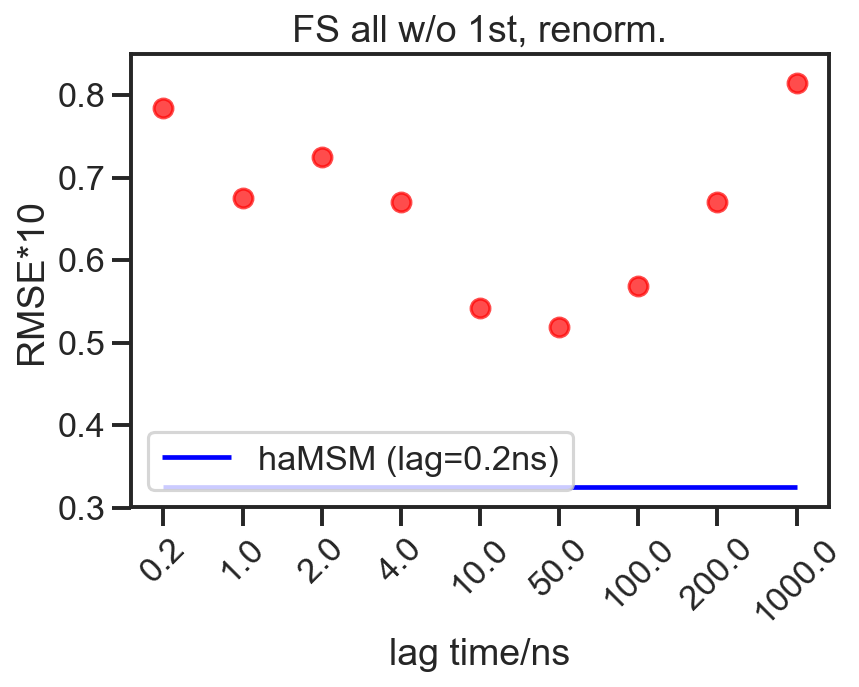

In [102]:
plt.figure(dpi=150)
plt.scatter(range(9), np.array([rmse(np.mean(mdFSweights_bootstrap_padded_renorm, axis=0), msmFSweights_temp_all[i][1:]/np.sum(msmFSweights_temp_all[i][1:])) for i in range(9)])*10, color='red', alpha=0.7)
plt.xlabel('lag time/ns')
plt.xticks(range(9), lags*0.2, rotation=45)
plt.ylabel('RMSE*10')
plt.title('FS all w/o 1st, renorm.')
plt.hlines(rmse(np.mean(mdFSweights_bootstrap_padded_renorm, axis=0), nmFSweights_temp[1:]/np.sum(nmFSweights_temp[1:]))*10, 0, 8, color='blue', label='haMSM (lag=0.2ns)')
plt.legend()
plt.show()